In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install multipledispatch
from multipledispatch import dispatch

## Problem Statement 

### Background:
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people. The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. 

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

#### Product Portfolio:
1. The KP281 is an entry-level treadmill that sells for $1,500.

2. The KP481 is for mid-level runners that sell for $1,750.

3. The KP781 treadmill is having advanced features that sell for $2,500.

### Feature definitions:

Product Purchased:	KP281, KP481, or KP781

Age:	In years

Gender:	Male/Female

Education:	In years

MaritalStatus:	Single or partnered

Usage:	The average number of times the customer plans to use the treadmill each week.

Income:	Annual income (in $)

Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

Miles:	The average number of miles the customer expects to walk/run each week

### Business requirement:
1. Identify the characteristics of the target audience for each type of treadmill offered by Aerofit.
2. Are there any differences across the product with respect to customer characteristics.

### Loading data

In [3]:
data = pd.read_csv("C:\\Users\\moncy\\Documents\\Scaler DSML MSc\\Projects\\Business Case_Aerofit_Descriptive_Stats_Probability\\original_aerofit_treadmill.csv")
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
data.shape

(180, 9)

Observations:
1. There are 180 rows and 9 features in the dataset.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Observations:
1. There are no missing values in the dataset.
2. The Age, Education, Usage, Fitness, Income and Miles are numeric data types.
3. The Product, Gender and MaritalStatus are object data types.

In [6]:
def extract_number(x):
    num = ''
    for i in x:
        if i.isdigit():
            num += i
    return int(num)

In [7]:
data['product_num'] = data['Product'].apply(extract_number)
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,product_num
0,KP281,18,Male,14,Single,3,4,29562,112,281
1,KP281,19,Male,15,Single,2,3,31836,75,281
2,KP281,19,Female,14,Partnered,4,3,30699,66,281
3,KP281,19,Male,12,Single,3,3,32973,85,281
4,KP281,20,Male,13,Partnered,4,2,35247,47,281


### Descriptive Statistical analysis

In [8]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,KP281,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0
product_num,180.0,NaN,NaN,NaN,458.777778,193.629132,281.0,281.0,481.0,481.0,781.0


Observations:
1. The most purchased treadmill segment is KP281. Atleast 75% of the customers have purchased either KP281 or KP481 treadmills.
2. The most number of customers are Males.
3. The marital status of most of the customers is Partnered.
4. The mean age if all the customers is 28.8 years and the median age is 26. This means that the customers' ages are slightly right skewed.
5. Atleast 50% of the customers have 16 years or more years of Education. Atleast 25% of the customers have exactly 16 years of education.
6. Atleast 50% of the customers have said that they will be using the treadmill atleast 3hrs on an average per week.
7. About 75% of the customers have said that their Fitness is more than 3.
8. The mean Income of the customers is 53719.58 and the median income is 50596.5. The income of 75% of the customers in the dataset is less that 58669.
9. The mean of Miles is 103.6 and the meadian is 94. Clearly the data in the variable Miles is skewed towards the right.

### Correlation

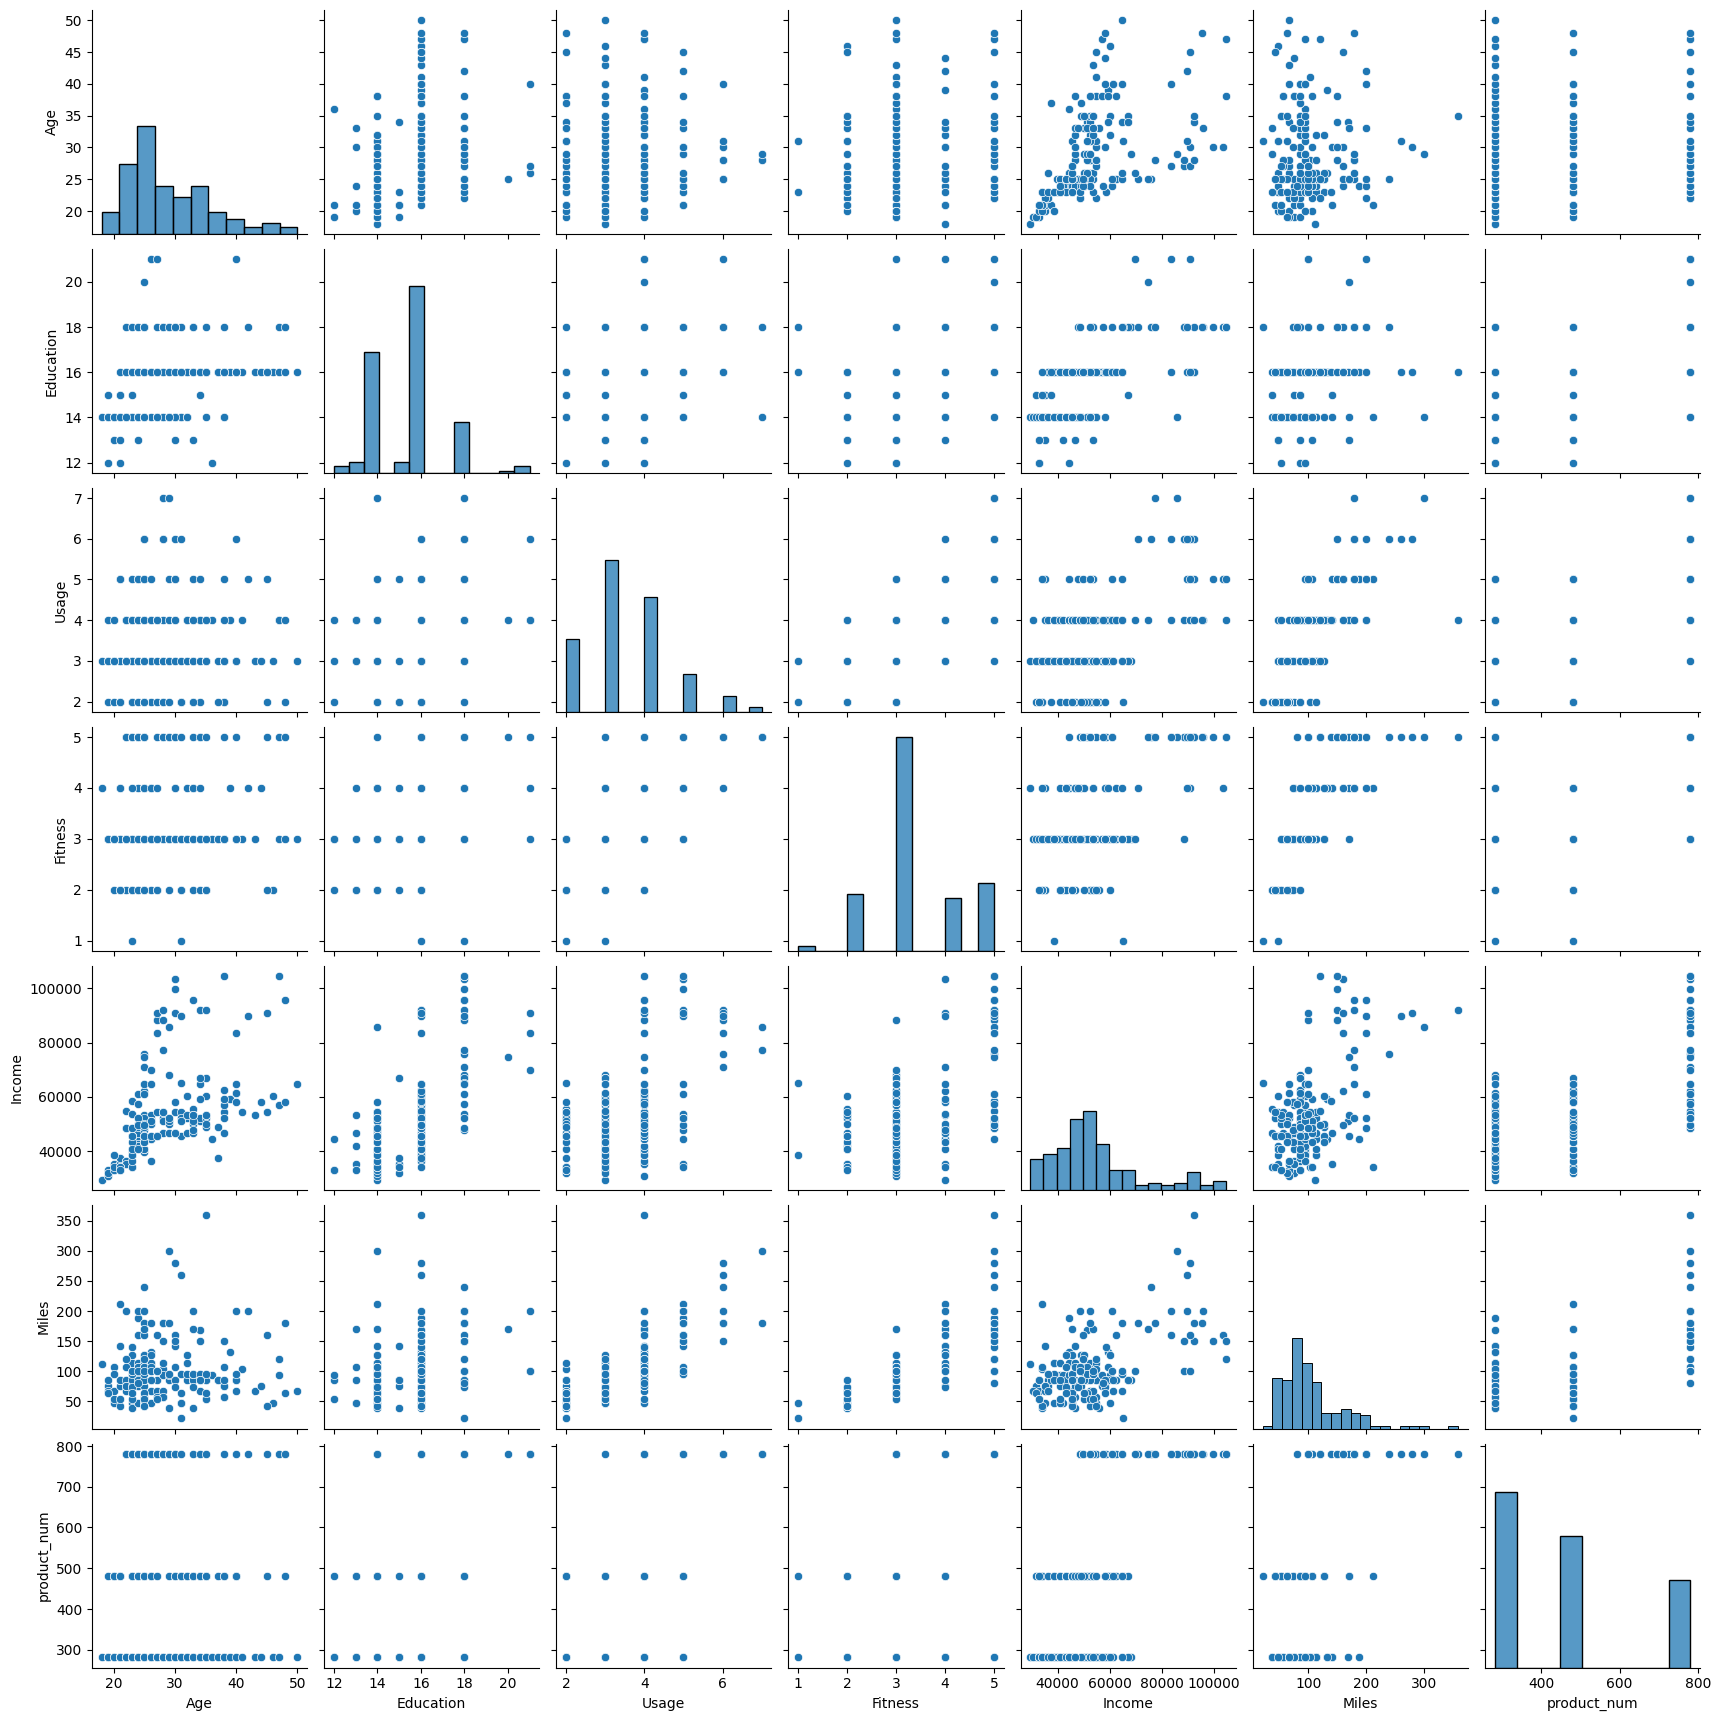

In [9]:
sns.pairplot(data)
plt.show()

Observations:
1. The KP281 seem to be spread across all ages whereas KP481 is more towards younger side and KP781 is slightly more towards the older side.
2. Customers with more years of education seem to like KP781 more.
3. Customers that purchased KP781 seem to be using the treadmill more than customers that purchased KP481.
4. Most of the customers that have purchased KP781 seem to be in better shape than KP481. 
5. Most customers that have purchased KP781 seem to have more income that customers that purchased KP281 and KP481.
6. Customers that purchased KP781 have said that they expect to cover more miles than the other 2 variants.

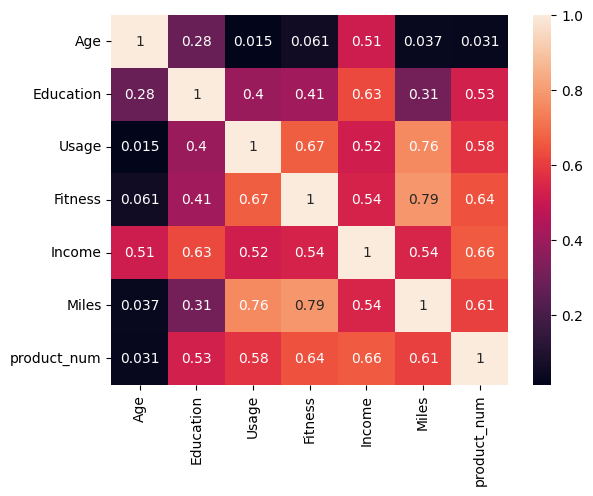

In [10]:
sns.heatmap(data[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles','product_num']].corr(), annot = True)
plt.show()

Observations:
1. The variables 'Fitness' and 'Miles' are the most correlated variables with a correlation of 0.79. Followed by 'Usage' and 'Miles' with 0.76.
2. With the Product segments, we can see that the features Income, Fitness and Miles have 0.66, 0.64 and 0.61 correlation respectively. Education and Usage have 0.53 and 0.58 and Age has the least correlation of 0.031.

#### Checking distributions

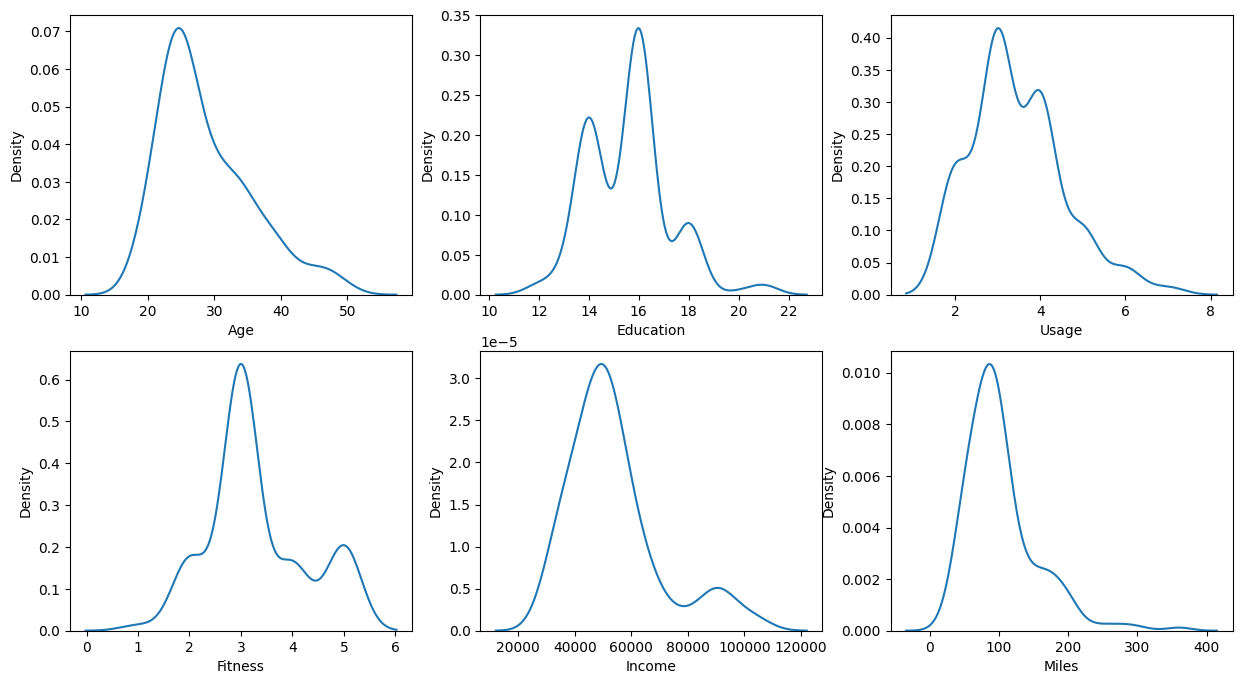

In [11]:
c = 1
plt.figure(figsize = (15,8))
for col in ['Age','Education', 'Usage','Fitness', 'Income', 'Miles']:
    plt.subplot(2,3,c)
    sns.kdeplot(data = data, x = col)
    c += 1
plt.show()

Observations:
1. The distribution of the Age, Income and the Miles features are right skewed. These are continuous random variables.
2. The Education, Usage and Fitness features are descrete random variables. These are also like gaussian distribution, however, they have multiple modes.

#### Product feature

In [12]:
print(f"There are {data['Product'].nunique()} unique categories in Product feature.")
print(f"The unique categories are:\n {data['Product'].unique()}")

There are 3 unique categories in Product feature.
The unique categories are:
 ['KP281' 'KP481' 'KP781']


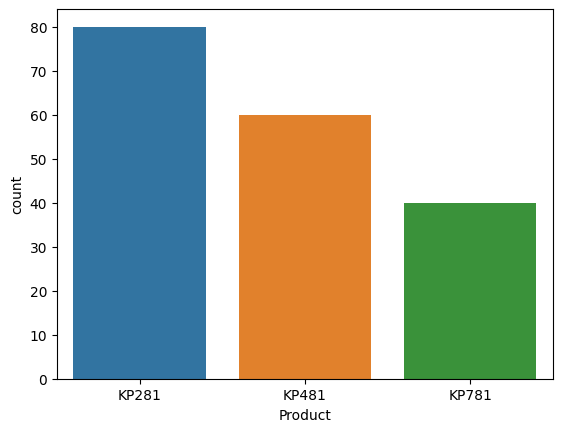

In [13]:
sns.countplot(data = data, x = 'Product')
plt.show()

Observations:
1. KP281 is the most purchased treadmill model followed by KP481.
2. The least purchased treadmill model is the KP781.
3. The cost of the treadmill could be a factor.

#### Age feature

In [14]:
print(f"There are {data['Age'].nunique()} unique categories in Age feature.")
print(f"The unique categories are:\n {data['Age'].unique()}")
print(f"Customers are between {data['Age'].min()} and {data['Age'].max()} years old.")

There are 32 unique categories in Age feature.
The unique categories are:
 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
Customers are between 18 and 50 years old.


Observations:
1. The customers in the dataset are between 18 years and 50 years old. The ages can be categorized into bins.

In [15]:
def check_outliers(data, feature):
    sns.boxplot(data = data, x = feature)
    plt.show()
    iqr = np.percentile(data[feature],75) - np.percentile(data[feature],25)
    lower_bound = np.percentile(data[feature],25) - (1.5 * iqr)
    upper_bound = np.percentile(data[feature],75) + (1.5 * iqr)
    lower_bound_outlier = data.loc[data[feature] < lower_bound]
    upper_bound_outlier = data.loc[data[feature] > upper_bound]
    lower_out_perc = lower_bound_outlier.shape[0]/data.shape[0]*100
    upper_out_perc = upper_bound_outlier.shape[0]/data.shape[0]*100
    outliers_percentage = 100 - (data.loc[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)].shape[0]/data.shape[0]*100)
    mid_50_data = [np.percentile(data[feature],25), np.percentile(data[feature],75)]
    print(f"The min value in {feature} feature is {data[feature].min()}")
    print(f"The max value in {feature} feature is {data[feature].max()}")
    print(f"The IQR is {iqr}")
    print(f"The middle 50 percent of data points are lying between {mid_50_data[0]} and {mid_50_data[1]}")
    print(f"The lower bound for {feature} feature is {lower_bound}")
    print(f"The upper bound for {feature} feature is {upper_bound}")
    print(f"There are about {round(lower_out_perc,2)} % of outliers lesser than the lower bound value {lower_bound} in the {feature} feature.")
    print(f"There are about {round(upper_out_perc,2)} % of outliers greater than the upper bound value {upper_bound} in the {feature} feature.")
    print(f"The overall percentage of outliers in the {feature} feature is {round(outliers_percentage,2)} %.")

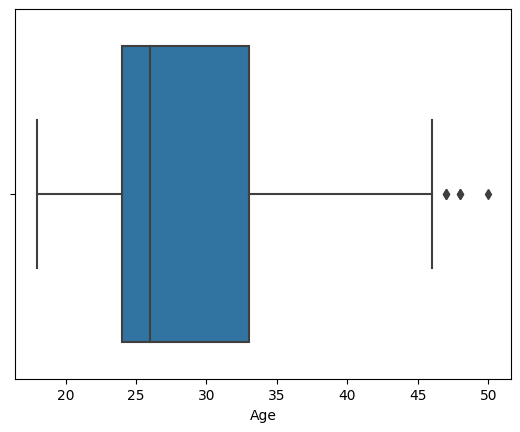

The min value in Age feature is 18
The max value in Age feature is 50
The IQR is 9.0
The middle 50 percent of data points are lying between 24.0 and 33.0
The lower bound for Age feature is 10.5
The upper bound for Age feature is 46.5
There are about 0.0 % of outliers lesser than the lower bound value 10.5 in the Age feature.
There are about 2.78 % of outliers greater than the upper bound value 46.5 in the Age feature.
The overall percentage of outliers in the Age feature is 2.78 %.


In [16]:
check_outliers(data, 'Age')

Observations:
1. The overall percentage of outliers in the Age feature is 2.78 %. The outliers are present after the upper bound Age value of 46.5 years.
2. The middle 50 % of the customers are between the ages 24 years and 33 years.

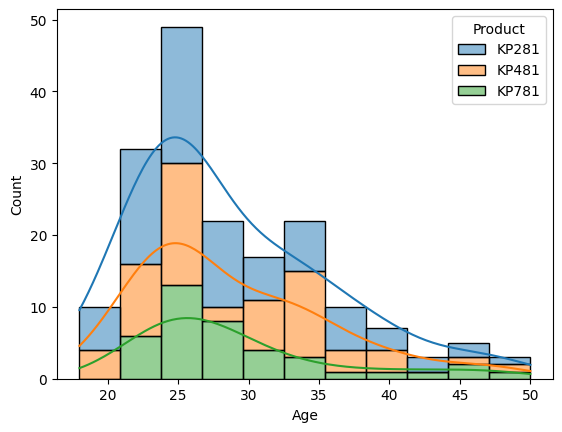

In [17]:
#Age with Product variants
sns.histplot(x=data['Age'], hue = data['Product'], multiple = 'stack', kde = True)
plt.show()

Observations:
1. Most of the customers that purchased the treadmills are between 24 and 35 years old.
2. The age feature can be binned to create a new feature. The customers ages can be binned as 20s, 30s and 40s.

In [18]:
#Binning the Age into 3 segments
data['age_bin'] = data['Age'].apply(lambda x: 'twenties' if x < 30 else ('thirties' if x < 40 else 'forties'))
data['age_bin'].value_counts()

age_bin
twenties    113
thirties     50
forties      17
Name: count, dtype: int64

Observations:
1. About 113 customers are in their twenties, 50 customers are in their thirties and 17 customers are in their forties.

In [19]:
#creating method overloading
 
# passing three parameter
  
@dispatch(pd.DataFrame, str, str)
def count_plot(data,col,color):
    sorted_list = sorted(data[col].unique())
    hue_sorted_list = sorted(data[color].unique())
    sns.countplot(data = data, x = col, hue = color, order = sorted_list, hue_order = hue_sorted_list)

    x= -0.35
    for i in sorted_list:
        for prod in hue_sorted_list:
            plt.text(x,1,str(round(data[(data[col]==i) & (data[color] == prod)].shape[0]/data[data[col]==i].shape[0]*100))+'%')
            x += 0.25
        x+=0.25

    plt.show()
 
# passing two parameters
 
@dispatch(pd.DataFrame, str)
def count_plot(data,col):
    sorted_list = sorted(data[col].unique())
    sns.countplot(data = data, x = col, order = sorted_list)
    x = -0.05
    for i in sorted_list:
        plt.text(x,5,str(round(data[data[col] == i].shape[0]/data.shape[0]*100))+'%')
        x += 1
    plt.show()

In [20]:
@dispatch(pd.DataFrame, str, str, str)
def box_plot(data, x, y, hue):
    sns.boxplot(data = data, x = x, y = y, hue = hue)
    plt.show()

    for i in data[x].unique():
        for j in data[hue].unique():
            print(f"Median {y} of {j} customers who purchased {i} is {np.percentile(data[(data[x] == i) & (data[hue] == j)][y],50)}")
            
@dispatch(pd.DataFrame, str, str)
def box_plot(data, x, y):
    sns.boxplot(data = data, x = x, y = y)
    plt.show()

    for i in data[x].unique():
        print(f"Median {y} of {i} customers is {np.percentile(data[data[x] == i][y],50)}")

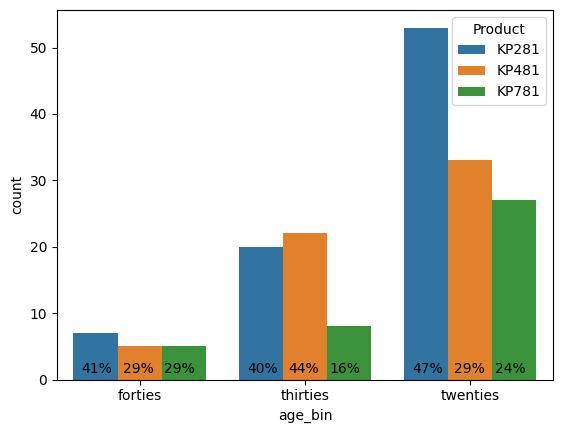

In [21]:
count_plot(data,'age_bin','Product')

Observations:
1. We can observe that, KP281 is more famous amoung the customers in their twenties and forties.
2. KP481 is more famous amoung the customers in their thirties. Considerable number of customers also like KP281 in their thirties.
3. KP781 is the least favorite for customers in their twenties and thirties.
4. Customers in their forties seem to like KP481 and KP781 alike.

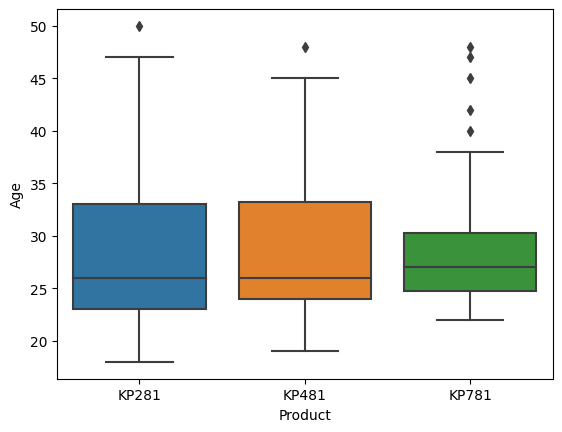

In [22]:
sns.boxplot(data = data, x = 'Product', y = 'Age')
plt.show()

Observations:
1. Atleast 75% of the treadmills in all three segments are bought by customers who are younger than 34 years old.
2. The median ages of customers that bought any treadmill is in their late 20s.
3. There are more outliers in the KP781 product with respect to age than in the other two product segments.
4. There are outliers in all three product segments with respect to customers' ages. KP781 has the most outliers with respect to customers' ages.

#### Gender feature

In [23]:
print(f"There are {data['Gender'].nunique()} unique categories in Gender feature.")
print(f"The unique categories are:\n {data['Gender'].unique()}")

There are 2 unique categories in Gender feature.
The unique categories are:
 ['Male' 'Female']


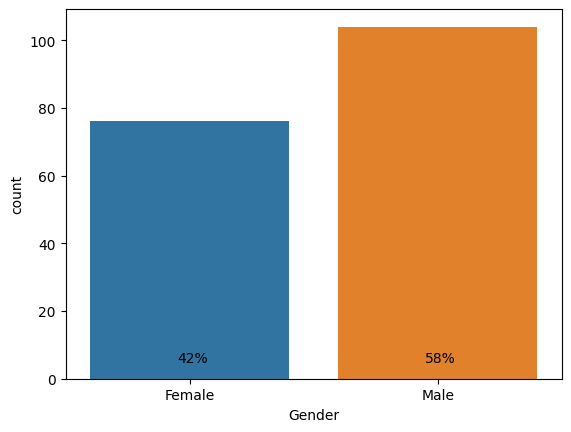

Gender
Male      104
Female     76
Name: count, dtype: int64

In [24]:
count_plot(data,'Gender')
data['Gender'].value_counts()

Observations:
1. Most of the customers that purchased the treadmills are males.
2. About 58% male customers and 42% female customers have purchased the treadmills.

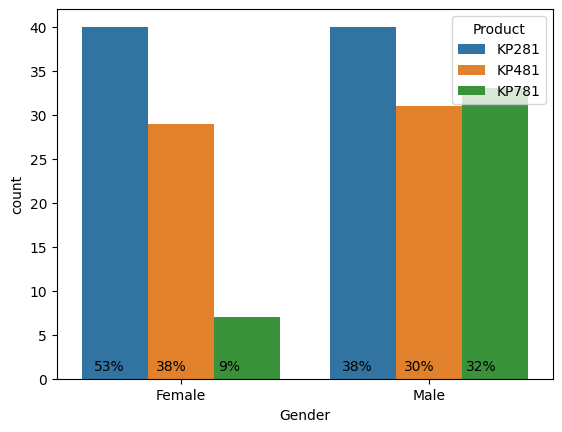

In [25]:
count_plot(data, 'Gender', 'Product')

Observations:
1. KP281 is the most favorite in both male and female categories.
2. KP781 is the second most favorite among the male customers whereas its the least favorite among the female customers and significantly less female customers seem to prefer it.
3. KP481 is the second most favorite among the female customers. Although its the least favorite among male customers, its still purchased almost equally as KP781.

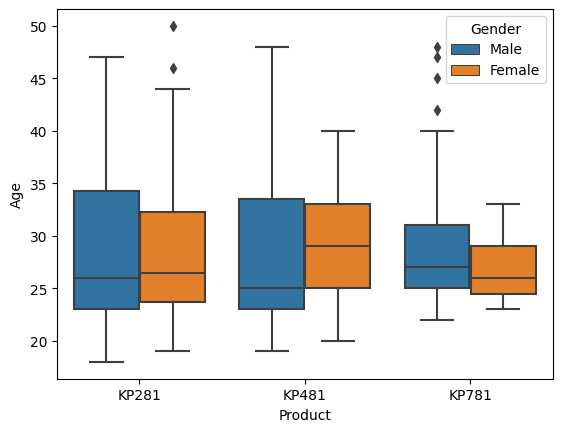

Median Age of Male customers who purchased KP281 is 26.0
Median Age of Female customers who purchased KP281 is 26.5
Median Age of Male customers who purchased KP481 is 25.0
Median Age of Female customers who purchased KP481 is 29.0
Median Age of Male customers who purchased KP781 is 27.0
Median Age of Female customers who purchased KP781 is 26.0


In [26]:
box_plot(data, 'Product', 'Age', 'Gender')

Observations:
1. The median age (29 years) of female customers that purchased KP481 is the greatest of all the other customers that purchased any of the treadmill segments.
2. The median age (25 years) of male customers that purchased KP481 is the least of all the other customers that purchased any of the treadmill segments.
3. The median ages of customers of both genders who purchased the KP281 is almost the same.
4. The median ages of customers of both genders who purchased the KP781 is almost the same.
5. The outliers in the KP781 product segment with respect to Age feature is coming from Male customers.
6. The outliers in the KP281 product segment with respect to Age feature is coming from Female customers.


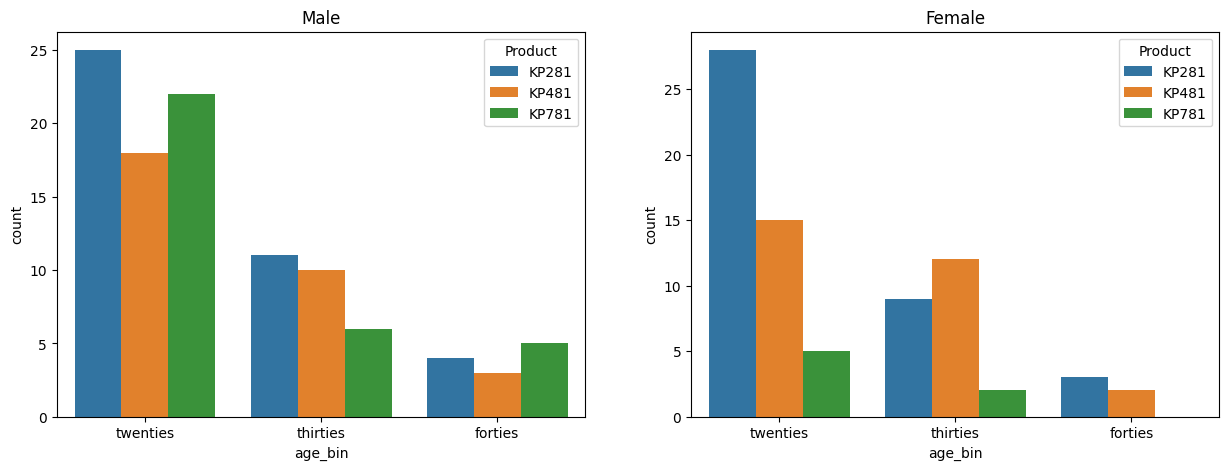

In [27]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(data = data[data['Gender'] == 'Male'], x = 'age_bin', hue = 'Product')
plt.title('Male')
plt.subplot(1,2,2)
sns.countplot(data = data[data['Gender'] == 'Female'], x = 'age_bin', hue = 'Product')
plt.title('Female')
plt.show()

Observations:
1. KP281 is the most favorite among the Male customers in their twenties and thirties and Female customers in their twenties and forties. It is the second favorite among the male customers in their forties and female customers in their thirties.
2. KP481 is the most favorite among the female customers in their thirties. It is the second favorite among the male customers in their twenties and thirties and among the female customers in their twenties and forties.
3. KP781 is the most favorite among male customers in their forties and second favorite in their thirties. Its the least favorite for male customers in their twenties. Among the female customers, its the least favorite in their twenties and thirties whereas female customers in their forties have not purchased KP781 per the dataset.

#### Education feature

In [28]:
print(f"There are {data['Education'].nunique()} unique categories in Education feature.")
print(f"The unique categories are:\n {data['Education'].unique()}")

There are 8 unique categories in Education feature.
The unique categories are:
 [14 15 12 13 16 18 20 21]


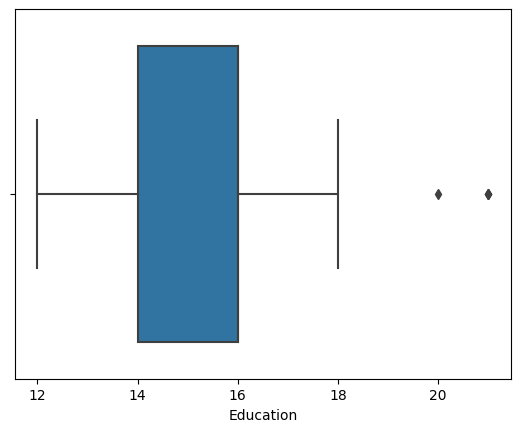

The min value in Education feature is 12
The max value in Education feature is 21
The IQR is 2.0
The middle 50 percent of data points are lying between 14.0 and 16.0
The lower bound for Education feature is 11.0
The upper bound for Education feature is 19.0
There are about 0.0 % of outliers lesser than the lower bound value 11.0 in the Education feature.
There are about 2.22 % of outliers greater than the upper bound value 19.0 in the Education feature.
The overall percentage of outliers in the Education feature is 2.22 %.


In [29]:
check_outliers(data,'Education')

Observations:
1. The overall percentage of outliers in the Education feature is 2.22 %. The outliers are present after the upper bound Education value of 19 years.
2. The middle 50 percent of customers with respect to Educations, have between 14 years and 16 years of Education.

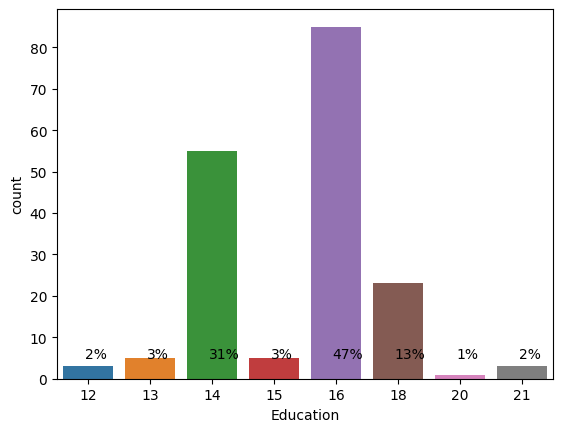

,Product
Education,
12,3
13,5
14,55
15,5
16,85
18,23
20,1
21,3


In [30]:
#Education and Product variants
count_plot(data, 'Education')
data.groupby(['Education'])[['Product']].count()

Observations:
1. About 47% of customers have 16 years of Education. 
2. About 31% customers have 14 years of Education.
3. About 13% customers have 18 years of Education.
4. Only 1 customer has 20 years, 3 customers have 12 and 21 years and 5 customers have 13 and 15 years of Education.

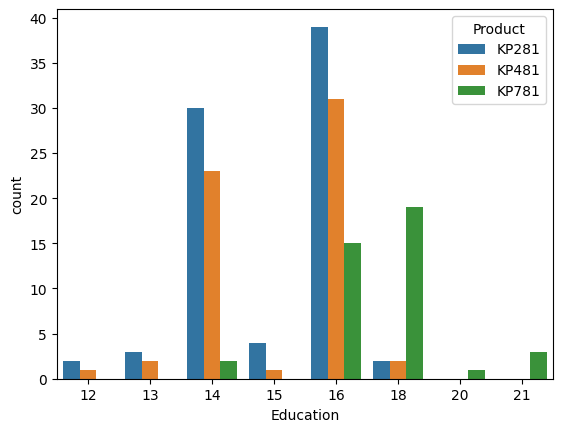

In [31]:
sns.countplot(data = data,x='Education', hue = 'Product')
plt.show()

Observations:
1. Customers with lower number of years of Education like 12, 13 and also 15 did not purchase KP781. They seem to prefer only KP281 and KP481.
2. Customers with the higher number of years of Education like 20 and 21 seem to purchase only KP781 and did not purchase KP281 and KP481.
3. The group of customers with 14, 16 and 18 years of Education have purchased one of all three Product segments.
4. The customers with Education of 18 years prefer KP781 more than the other segments even though this group has customers that are choosing from all three Product segments.
5. Customers having 12, 13, 14, 15 and 16 years of Education have purchased KP281 the most followed by KP481.


#### MaritalStatus feature

In [32]:
print(f"There are {data['MaritalStatus'].nunique()} unique categories in MaritalStatus feature.")
print(f"The unique categories are:\n {data['MaritalStatus'].unique()}")

There are 2 unique categories in MaritalStatus feature.
The unique categories are:
 ['Single' 'Partnered']


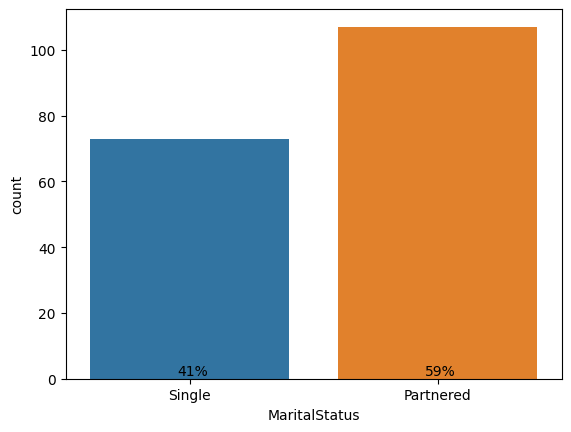

In [33]:
sns.countplot(data = data, x = 'MaritalStatus')
i = -0.05

for status in data['MaritalStatus'].unique():
    plt.text(i,1,str(round(data[data['MaritalStatus'] == status].shape[0]/ data.shape[0]*100))+"%")
    i += 1
plt.show()

Observations:
1. The dataset has 41% of single customers and 59% of customers have a partner.

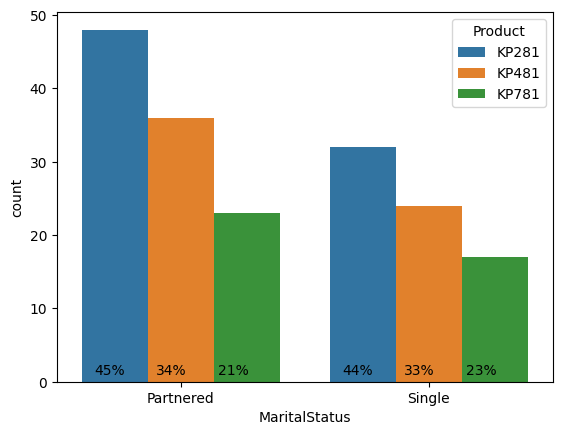

In [34]:
#MaritalStatus and Product variants
count_plot(data, 'MaritalStatus', 'Product')

Observations:
1. KP281 is the most popular Product segment in both Single and Partnered customer groups.
2. KP781 is the least purchased product segment in both Single and Partnered groups.

#### Usage feature

In [35]:
print(f"There are {data['Usage'].nunique()} unique categories in Usage feature.")
print(f"The unique categories are:\n {data['Usage'].unique()}")

There are 6 unique categories in Usage feature.
The unique categories are:
 [3 2 4 5 6 7]


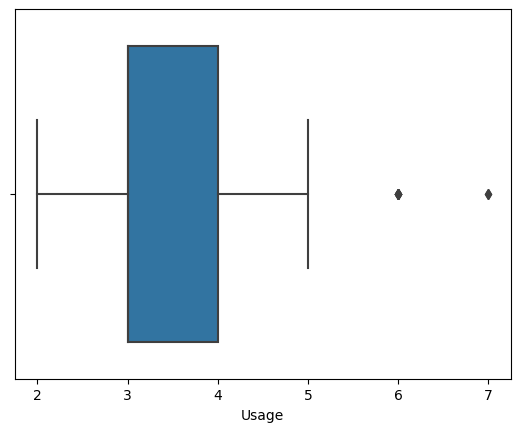

The min value in Usage feature is 2
The max value in Usage feature is 7
The IQR is 1.0
The middle 50 percent of data points are lying between 3.0 and 4.0
The lower bound for Usage feature is 1.5
The upper bound for Usage feature is 5.5
There are about 0.0 % of outliers lesser than the lower bound value 1.5 in the Usage feature.
There are about 5.0 % of outliers greater than the upper bound value 5.5 in the Usage feature.
The overall percentage of outliers in the Usage feature is 5.0 %.


In [36]:
check_outliers(data,'Usage')

Observations:
1. The overall percentage of outliers in the Usage feature is 5 %. All outliers are after the upper bound.
2. 50 % of the customers have mentioned that they will use the treadmill between 3 to 4 hours on an average per week.

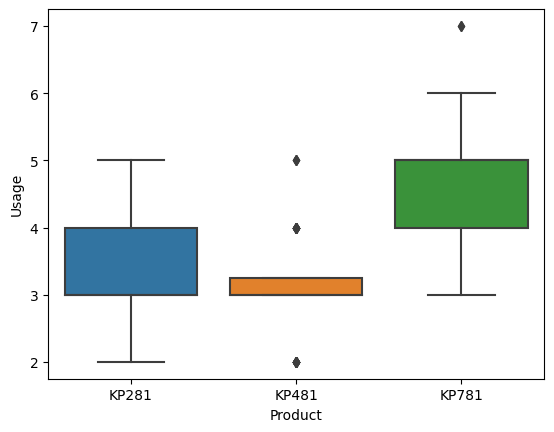

In [37]:
#Usage and Product Variants  
sns.boxplot(data = data, x = 'Product', y = 'Usage')
plt.show()

Observations:
1. The KP481 have the most number of outliers with respect to Usage followed by KP781.
2. Customers that purchased KP781 seem to use the product more number of hours on an average per week.
3. Most of the customers that purchased KP481 seem to be using the treadmill close to 3 hours on an average per week.

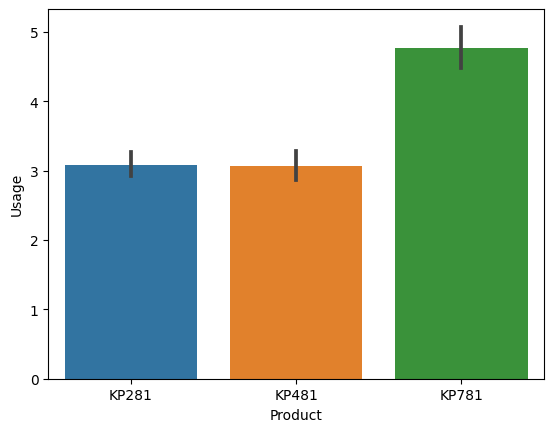

In [38]:
#Usage and Product Variants
sns.barplot(data = data, x = 'Product', y = 'Usage')
plt.show()

Observations:
1. On an average the customers that purchased KP781 is using the product more that customers that purchased KP281 and KP481.
2. The average usage of treadmill by customers that purchased KP781 is close to 4.75 hours per week and the average usage of treadmill by customers that purchased KP481 and KP281 is close to 3 hours per week.

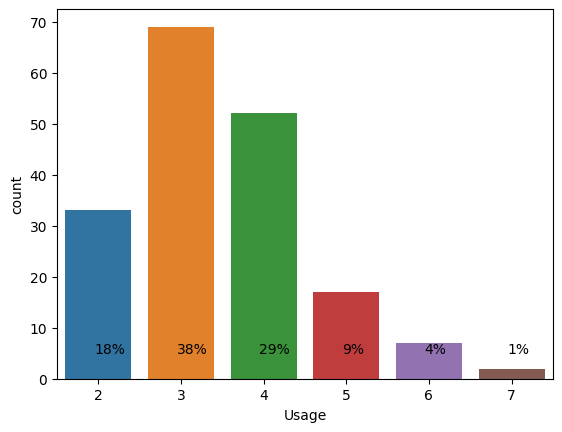

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

In [39]:
count_plot(data, 'Usage')
data['Usage'].value_counts()

Observations:
1. The top three average hours of Usage per week are 3 hours, 4 hours and 2 hours with 38 %, 29 % and 18 % of customers respectively.
2. Only 2 customers, i.e, 1% of customers have said that they will use the product for 7 hours per week.

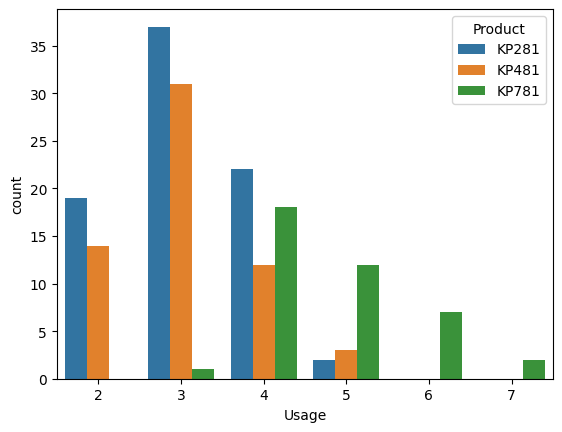

In [40]:
#Usage and Product Variants
sns.countplot(data = data, x = 'Usage', hue = 'Product')
plt.show()

Observations:
1. Customers that recorded 6 and 7 hours average per week usage are the customers that purchased KP781.
2. The customers that purchased KP781 seem to be using the treadmill more hours per week on average (5+ hours) than those that purchsed the other 2 variants.
3. KP281 is popular among customers who use the product less than 4 hours per week.

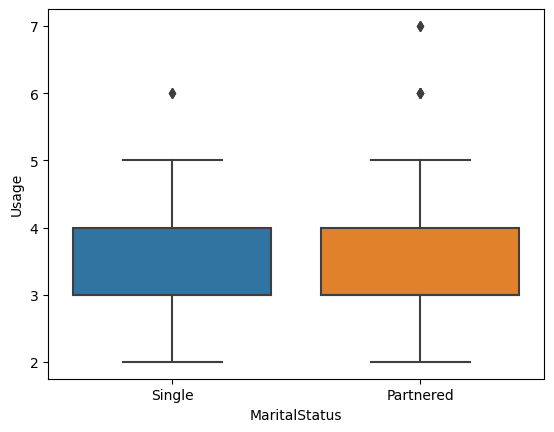

Median Usage of Single customers is 3.0
Median Usage of Partnered customers is 3.0


In [41]:
#MaritalStatus and Product Usage
box_plot(data,'MaritalStatus','Usage')

Observations:
1. Both Single and Partnered customers have the same median Usage hours per week.
2. There are more outliers amoung the Partnered customers than amoung the Single customers.
3. For both Single and Partnered customers, the lower and upper bound from IQR are between 2 to 5 hours per week. Meaning, majority of the customers prefer to use the treadmiles between 2 to 5 hours per week on an average.
4. With respect to Usage feature, the customers with partners have more outliers than single customers.

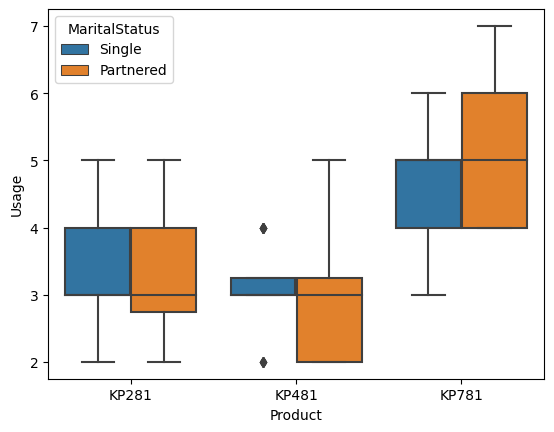

Median Usage of Single customers who purchased KP281 is 3.0
Median Usage of Partnered customers who purchased KP281 is 3.0
Median Usage of Single customers who purchased KP481 is 3.0
Median Usage of Partnered customers who purchased KP481 is 3.0
Median Usage of Single customers who purchased KP781 is 5.0
Median Usage of Partnered customers who purchased KP781 is 5.0


In [42]:
#Usage, MaritalStatus and Product Variants
box_plot(data,'Product','Usage', 'MaritalStatus')

Observations:
1. The median average hours of Usage per week for cutomers that purchased KP781 is greater than the median average hours of usage of customers that purchased KP281 or KP481.
2. Most of the Partnered customers who purchased KP481 have the lower number of average hours of usage per week. 
3. The outliers seem to be deminished with respect to Usage for the product segment. Only single customers who purchased KP481 seem to have outliers.

#### Fitness feature

In [43]:
print(f"There are {data['Fitness'].nunique()} unique categories in Fitness feature.")
print(f"The unique categories are:\n {data['Fitness'].unique()}")

There are 5 unique categories in Fitness feature.
The unique categories are:
 [4 3 2 1 5]


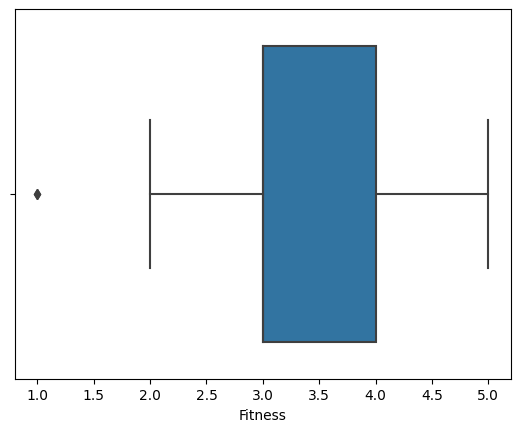

The min value in Fitness feature is 1
The max value in Fitness feature is 5
The IQR is 1.0
The middle 50 percent of data points are lying between 3.0 and 4.0
The lower bound for Fitness feature is 1.5
The upper bound for Fitness feature is 5.5
There are about 1.11 % of outliers lesser than the lower bound value 1.5 in the Fitness feature.
There are about 0.0 % of outliers greater than the upper bound value 5.5 in the Fitness feature.
The overall percentage of outliers in the Fitness feature is 1.11 %.


In [44]:
check_outliers(data, 'Fitness')

Observations:
1. Approximately 1.11 % of data points in the Fitness feature are outliers.
2. The middle 50% of the customers have said that their Fitness level is between 3 and 4 out of 5

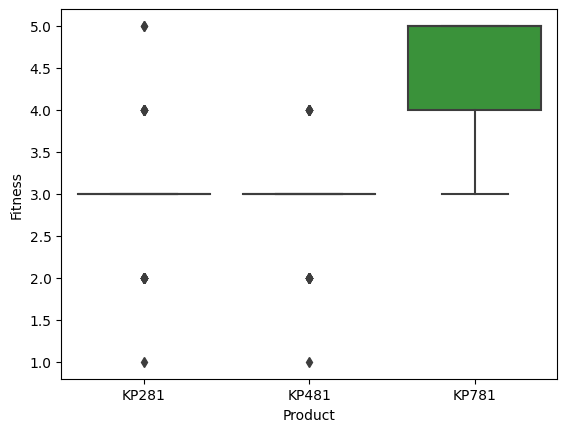

Median Fitness of KP281 customers is 3.0
Median Fitness of KP481 customers is 3.0
Median Fitness of KP781 customers is 5.0


In [45]:
box_plot(data, 'Product','Fitness')

Observations:
1. The median Fitness value of customers that purchased KP781 is higher than the fitness value of customers that purchased the other 2 variants.
2. The outliers are present in the customers group that purchased KP281 and KP481.

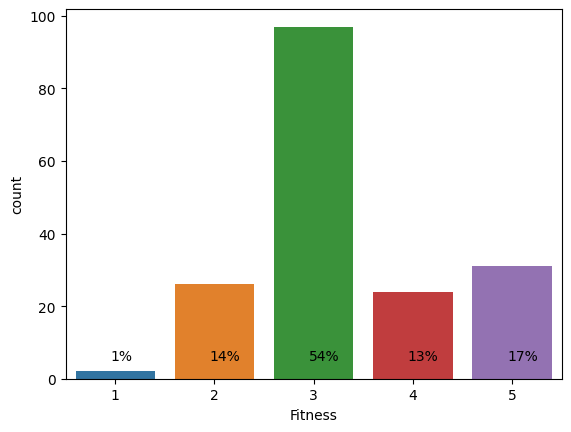

In [46]:
count_plot(data, 'Fitness')

Observations:
1. 53% of the customers have voted their fitness level to be 3.
2. 17% of the customers have voted their fitness level to be 5.

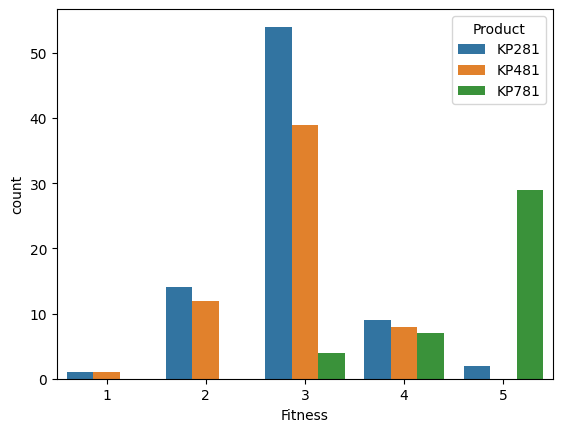

In [47]:
sns.countplot(data = data, x = 'Fitness', hue = 'Product')
plt.show()

Observations:
1. KP781 is purchased only by customers who have voted their Fitness level as 3 or above.
2. KP781 is the most popular product variant for customers that rated their Fitness level as 5
3. KP281 is the most popular choise for customers that rated their fitness level as 4 or less.

#### Income feature

In [48]:
print(f"There are {data['Income'].nunique()} unique categories in Income feature.")
print(f"The unique categories are:\n {data['Income'].unique()}")

There are 62 unique categories in Income feature.
The unique categories are:
 [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]


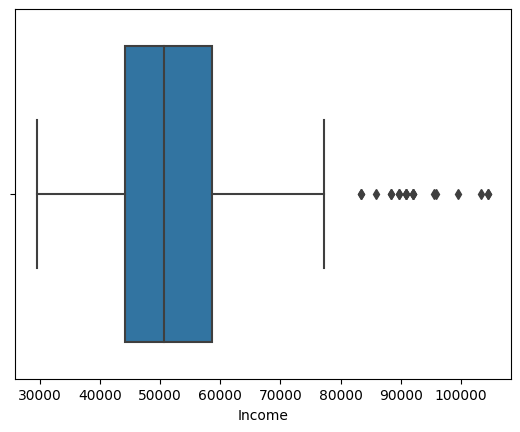

The min value in Income feature is 29562
The max value in Income feature is 104581
The IQR is 14609.25
The middle 50 percent of data points are lying between 44058.75 and 58668.0
The lower bound for Income feature is 22144.875
The upper bound for Income feature is 80581.875
There are about 0.0 % of outliers lesser than the lower bound value 22144.875 in the Income feature.
There are about 10.56 % of outliers greater than the upper bound value 80581.875 in the Income feature.
The overall percentage of outliers in the Income feature is 10.56 %.


In [49]:
check_outliers(data , 'Income')


Observations:
1. There are about 10.56% of outliers in the Income feature.
2. The middle 50 % of data points that is atleast the middle 50% of the customers lie in the income group range between 44058 to 58668.

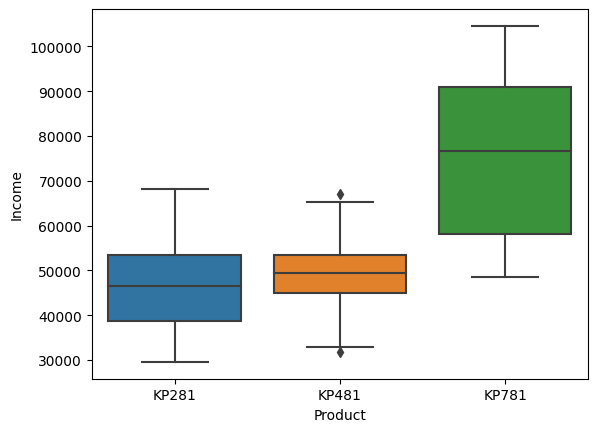

Median Income of KP281 customers is 46617.0
Median Income of KP481 customers is 49459.5
Median Income of KP781 customers is 76568.5


In [50]:
#Income and product variants
box_plot(data, 'Product', 'Income')

Observations:
1. The median Income of customers that purchased KP781 is higher than the median customers that purchased the other two variants.
2. The median Income of customers that purchased KP281 is the least amoung the customers that purchased the treadmills.
3. There are some outliers in the Income of customers that purchased the KP481 variant.

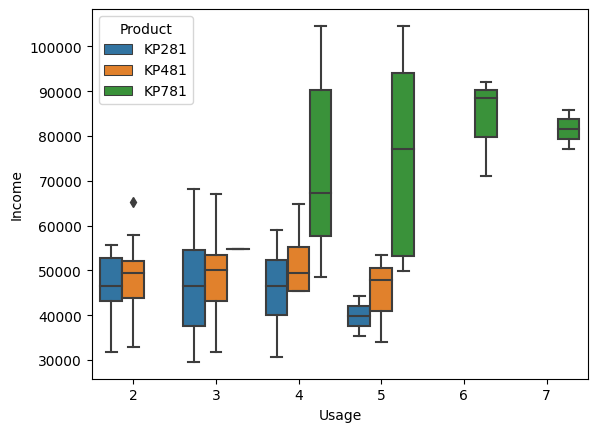

In [51]:
#Income, Usage and product variants
sns.boxplot(data = data, y = 'Income', x = 'Usage', hue = 'Product')
plt.show()

Observations:
1. Customers that purchased KP781 consistently have higher Income and greater number of hours per week of usage.
2. Customers that purchased KP281 consistently have the lowest median income and low number of hours per week of usage.


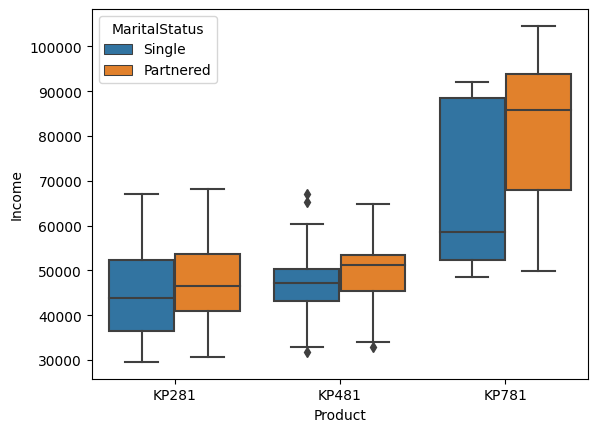

Median Income of Single customers who purchased KP281 is 43774.5
Median Income of Partnered customers who purchased KP281 is 46617.0
Median Income of Single customers who purchased KP481 is 47185.5
Median Income of Partnered customers who purchased KP481 is 51165.0
Median Income of Single customers who purchased KP781 is 58516.0
Median Income of Partnered customers who purchased KP781 is 85906.0


In [52]:
#Income, MaritalStatus and product variants
box_plot(data,'Product','Income', 'MaritalStatus')

Observations:
1. Income seem to be playing a role in what treadmill the customers purchase. The customers that purchase KP781 seem to have higher median income than those that purchase KP481 or KP281.
2. The median income of customers with partners that purchased KP781 is higher than single customers that purchased KP781.
3. Customers that purchased KP281 have the lowest median incomes.
4. With respect to Income feature, there are some outliers in the single customers and customers with partners group that purchased KP481.

#### Miles feature

In [53]:
print(f"There are {data['Miles'].nunique()} unique categories in Miles feature.")
print(f"The unique categories are:\n {data['Miles'].unique()}")

There are 37 unique categories in Miles feature.
The unique categories are:
 [112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


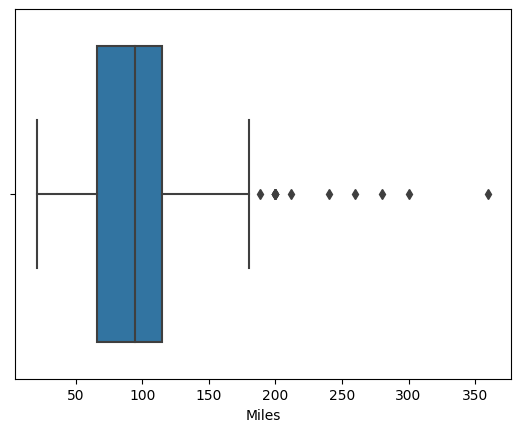

The min value in Miles feature is 21
The max value in Miles feature is 360
The IQR is 48.75
The middle 50 percent of data points are lying between 66.0 and 114.75
The lower bound for Miles feature is -7.125
The upper bound for Miles feature is 187.875
There are about 0.0 % of outliers lesser than the lower bound value -7.125 in the Miles feature.
There are about 7.22 % of outliers greater than the upper bound value 187.875 in the Miles feature.
The overall percentage of outliers in the Miles feature is 7.22 %.


In [54]:
check_outliers(data, 'Miles')

Observations:
1. The Miles feature has 7.22 % data points outliers.
2. The middle 50% of the customers have covered between 66 to 114.75 miles.
3. The least and the most Miles covered are 21 and 360.

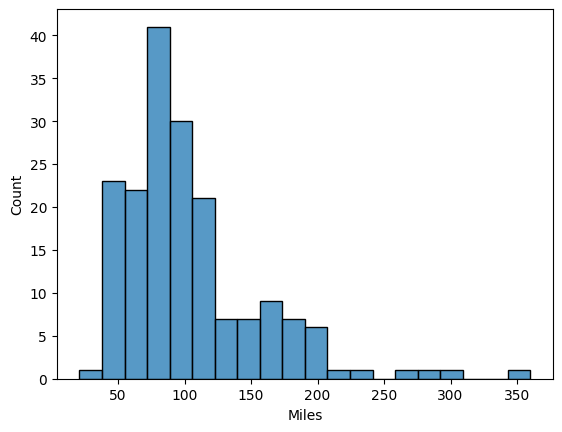

In [55]:
sns.histplot(data = data, x= 'Miles')
plt.show()

Observations:
1. Most of the customers have covered between 40 to 125 Miles.
2. The distribution of Miles feature is right skewed. There are some outliers in the right tail.

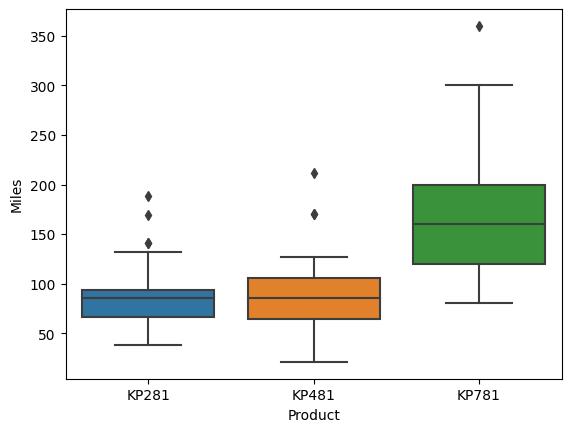

Median Miles of KP281 customers is 85.0
Median Miles of KP481 customers is 85.0
Median Miles of KP781 customers is 160.0


In [56]:
#Miles and product variants
box_plot(data, 'Product', 'Miles')

Observations:
1. The median Miles covered by customers that purchased KP781 is clearly higher than the median Miles covered by customers that purchased the other two variants.
2. The median Miles covered by customers that purchased KP281 and KP481 are the same. 

<Axes: xlabel='Miles', ylabel='Density'>

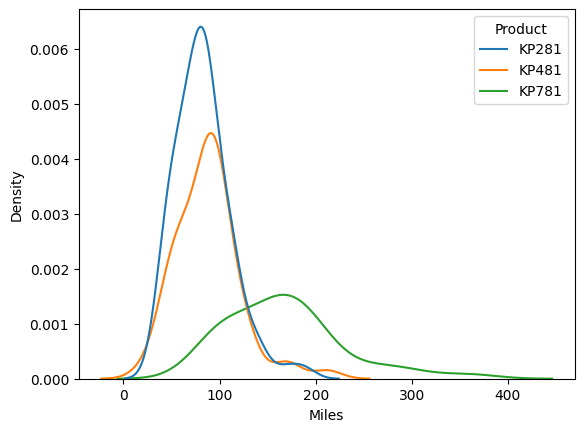

In [57]:
#Miles and product variants
sns.kdeplot(data = data, x = 'Miles', hue = 'Product')

Observations:
1. The variance and standard deviation of Miles feature for customers that purchased KP781 is greater than the variance and standard deviation of Miles for customers that purchased KP281 and KP481.

### Checking the probabilities

In [58]:
def get_marginal_probabilities(data, x = 'Product', y = None,  normalize = False):
    c_tab = pd.crosstab(data[x],[data[i] for i in y], margins = True, margins_name = 'total', normalize = normalize)
    
    #marginal probabilities
    for i in c_tab.index[:-1]:
        marg_prob = round(c_tab.loc[i,'total']/c_tab.loc['total','total'],4)
        print(f"The marginal probability of {i} product variant is {marg_prob}")
    for i in c_tab.columns[:-1]:
        marg_prob = round(c_tab.loc['total',i]/c_tab.loc['total','total'],4)
        print(f"The marginal probability of {i} in the dataset is {marg_prob}")
        
    return c_tab

In [59]:
def get_joint_probabilities(data, x = 'Product', y = None, normalize = False):
    c_tab = pd.crosstab(data[x],[data[i] for i in y], margins = True, margins_name = 'total', normalize = normalize)
   
    #joint probabilities
    for row in c_tab.index[:-1]:
        for col in c_tab.columns[:-1]:
            joint_prob = round(c_tab.loc[row, col]/ c_tab.loc['total', 'total'],4)
            print(f"The joint probability of the product variant {row} AND {col} is {joint_prob}")
    
    return c_tab

In [60]:
def get_cond_probabilities(data, x = 'Product', y = None,normalize = False):
    c_tab = pd.crosstab(data[x],[data[i] for i in y], margins = True, margins_name = 'total', normalize = normalize)
   
    for row in c_tab.index[:-1]:
        for col in c_tab.columns[:-1]:
            cond_prob = round(c_tab.loc[row,col]/c_tab.loc['total',col],4)
            print(f"Given {col}, the probability of the product variant {row} being purchased is {cond_prob}")
    for row in c_tab.index[:-1]:
        for col in c_tab.columns[:-1]:
            cond_prob = round(c_tab.loc[row,col]/c_tab.loc[row,'total'],4)
            print(f"Given {row} is purchased, the probability of {col} is {cond_prob}")
    
    return c_tab

#### Probabilities with respect to Gender feature

In [61]:
get_marginal_probabilities(data, y = ['Gender'])

The marginal probability of KP281 product variant is 0.4444
The marginal probability of KP481 product variant is 0.3333
The marginal probability of KP781 product variant is 0.2222
The marginal probability of Female in the dataset is 0.4222
The marginal probability of Male in the dataset is 0.5778


Gender,Female,Male,total
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
total,76,104,180


Observations:
1. The probability that a Male customer purchases the treadmill is 57.78 %.
2. The probability that a Female customer purchases the treadmill in 42.22 %.
3. Hence we can expect slightly more Male customers than Female customers to visit.
4. The probability the treadmill variant KP281 is purchased is 44.44 %.
5. The probability the treadmill variant KP481 is purchased is 33.33 %.
6. The probability the treadmill variant KP781 is purchased is 22.22 %.
7. Hence we can plan the stocks of the three variants. KP281 is purchased more often than KP481 and KP481 is purchased more often than KP781.

In [62]:
get_joint_probabilities(data, y = ['Gender'])

The joint probability of the product variant KP281 AND Female is 0.2222
The joint probability of the product variant KP281 AND Male is 0.2222
The joint probability of the product variant KP481 AND Female is 0.1611
The joint probability of the product variant KP481 AND Male is 0.1722
The joint probability of the product variant KP781 AND Female is 0.0389
The joint probability of the product variant KP781 AND Male is 0.1833


Gender,Female,Male,total
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
total,76,104,180


Observations:
1. The probability that a Male customer purchases and the purchased variant is KP281 is 22.22 %.
2. The probability that a Female customer purchases and the purchased variant is KP281 is 22.22 %.
3. The probability that a Male customer purchases and the purchased variant is KP481 is 17.22 %.
4. The probability that a Female customer purchases and the purchased variant is KP481 is 16.11 %.
5. The KP281 and KP481 seem to be purchased almost with equal probabilities by male and female customers.
5. The probability that a Male customer purchases and the purchased variant is KP781 is 18.33 %.
6. The probability that a Female customer purchases and the purchased variant is KP781 is 3.89 %.
7. The variant KP781 is purchased more by Male customers than by female customers.

In [63]:
get_cond_probabilities(data, y = ['Gender'])

Given Female, the probability of the product variant KP281 being purchased is 0.5263
Given Male, the probability of the product variant KP281 being purchased is 0.3846
Given Female, the probability of the product variant KP481 being purchased is 0.3816
Given Male, the probability of the product variant KP481 being purchased is 0.2981
Given Female, the probability of the product variant KP781 being purchased is 0.0921
Given Male, the probability of the product variant KP781 being purchased is 0.3173
Given KP281 is purchased, the probability of Female is 0.5
Given KP281 is purchased, the probability of Male is 0.5
Given KP481 is purchased, the probability of Female is 0.4833
Given KP481 is purchased, the probability of Male is 0.5167
Given KP781 is purchased, the probability of Female is 0.175
Given KP781 is purchased, the probability of Male is 0.825


Gender,Female,Male,total
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
total,76,104,180


Observations:
1. Given its a Female customer, the probability of the product variant KP281 being purchased is 52.63%, the probability of the product variant KP481 being purchased is 38.16% and the probability of the product variant KP781 being purchased is 9.21%.
2. Given its a Male, the probability of the product variant KP281 being purchased is 38.46%, the probability of the product variant KP481 being purchased is 29.81% and the probability of the product variant KP781 being purchased is 31.73%.
3. Given that KP281 is purchased, the probability that the customer is female is 50% and the probability that the customer is a male is 50%.
4. Given that KP481 is purchased, the probability that the customer is female is 48.33% and the probability that the customer is a male is 51.67%
5. Given that KP781 is purchased, the probability that the customer is female is 17.5% and the probability that the customer is a male is 82.5%.
6. When considering only the gender, a female customer is more likely to purchase KP281 with a probability of 52.63% than the other 2 variants and a male customer is more likely to purchase KP281 with a probability of 38.46%.
7. When it comes to purchasing KP281, although male and female customers have 50-50 chance of purchasing it, a female customer has more bias towards KP281 than a male customer based on the probabilities in their specific genders(female - 52.63%, male 38.16%) when compared to the other product variants.
8. The male customer has pretty close probability of purchasing KP481 or KP781 at 29.81% and 31.73%.

#### Probabilities with respect to Age feature

In [64]:
get_marginal_probabilities(data, y = ['age_bin'])

The marginal probability of KP281 product variant is 0.4444
The marginal probability of KP481 product variant is 0.3333
The marginal probability of KP781 product variant is 0.2222
The marginal probability of forties in the dataset is 0.0944
The marginal probability of thirties in the dataset is 0.2778
The marginal probability of twenties in the dataset is 0.6278


age_bin,forties,thirties,twenties,total
Product,,,,
KP281,7,20,53,80
KP481,5,22,33,60
KP781,5,8,27,40
total,17,50,113,180


Observations:
1. The probability of a customer in their forties to purchase a treadmill is 9.44%.
2. The probability of a customer in their thirties to purchase a treadmill is 27.78%.
3. The probability of a customer in their twenties to purchase a treadmill is 62.78%.
4. The probability of customers in their twenties to purchase a treadmill is a lot higher that customers in their thirties and forties.
5. Customers in their forties and above are least likely to purchase a treaddmill when compared to customers in their thirties and twenties.

In [65]:
get_joint_probabilities(data, y = ['age_bin'])

The joint probability of the product variant KP281 AND forties is 0.0389
The joint probability of the product variant KP281 AND thirties is 0.1111
The joint probability of the product variant KP281 AND twenties is 0.2944
The joint probability of the product variant KP481 AND forties is 0.0278
The joint probability of the product variant KP481 AND thirties is 0.1222
The joint probability of the product variant KP481 AND twenties is 0.1833
The joint probability of the product variant KP781 AND forties is 0.0278
The joint probability of the product variant KP781 AND thirties is 0.0444
The joint probability of the product variant KP781 AND twenties is 0.15


age_bin,forties,thirties,twenties,total
Product,,,,
KP281,7,20,53,80
KP481,5,22,33,60
KP781,5,8,27,40
total,17,50,113,180


Observations:
1. The probability of a customer in their forties purchasing a treadmill and a KP281 variant being purchased is 3.89%.
2. The probability of a customer in their thirties purchasing a treadmill and a KP281 variant being purchased is 11.11%.
3. The probability of a customer in their twenties purchasing a treadmill and a KP281 variant being purchased is is 29.44%.
4. The probability of a customer in their twenties purchasing a treadmill and a KP281 variant being purchased is higher than other customers.
5. The probability of a customer in their forties purchasing a treadmill and a KP481 variant being purchased is 2.78%.
6. The probability of a customer in their thirties purchasing a treadmill and a KP481 variant being purchased is 12.22%.
7. The probability of a customer in their twenties purchasing a treadmill and a KP481 variant being purchased is 18.33%.
8. The probability of a customer in their twenties purchasing a treadmill and a KP481 variant being purchased is higher than other customers.
10. The probability of a customer in their forties purchasing a treadmill and a KP781 variant being purchased is 2.78%.
11. The probability of a customer in their thirties purchasing a treadmill and a KP781 variant being purchased is 4.44%.
12. The probability of a customer in their twenties purchasing a treadmill and a KP781 variant being purchased is 15%.
13. The probability of a customer in their twenties purchasing a treadmill and a KP781 variant being purchased is higher than other customers.

In [66]:
get_cond_probabilities(data, y = ['age_bin'])

Given forties, the probability of the product variant KP281 being purchased is 0.4118
Given thirties, the probability of the product variant KP281 being purchased is 0.4
Given twenties, the probability of the product variant KP281 being purchased is 0.469
Given forties, the probability of the product variant KP481 being purchased is 0.2941
Given thirties, the probability of the product variant KP481 being purchased is 0.44
Given twenties, the probability of the product variant KP481 being purchased is 0.292
Given forties, the probability of the product variant KP781 being purchased is 0.2941
Given thirties, the probability of the product variant KP781 being purchased is 0.16
Given twenties, the probability of the product variant KP781 being purchased is 0.2389
Given KP281 is purchased, the probability of forties is 0.0875
Given KP281 is purchased, the probability of thirties is 0.25
Given KP281 is purchased, the probability of twenties is 0.6625
Given KP481 is purchased, the probabilit

age_bin,forties,thirties,twenties,total
Product,,,,
KP281,7,20,53,80
KP481,5,22,33,60
KP781,5,8,27,40
total,17,50,113,180


Observations:
1. Given that a customer is in their forties, the probability that they will purchase the product variant KP281 is 41.18%, the probability that they will purchase the product variant KP481 is 29.41% and the probability that they will purchase the product variant KP781 is 29.41%.
2. Given that a customer is in their thirties, the probability that they will purchase the product variant KP281 is 40%, the probability that they will purchase the product variant KP481 is 44% and the probability that they will purchase the product variant KP781 is 16%.
3. Given that a customer is in their twenties, the probability that they will purchase the product variant KP281 is 46.9%, the probability that they will purchase the product variant KP481 is 29.2% and the probability that they will purchase the product variant KP781 is 23.89%.
4. Given a KP281 is purchased, the probability that the customer is in their twenties is 66.25%, the probability that the customer is in their thirties is 25% and the probability that the customer is in their forties is 8.75%.
5. Given a KP481 is purchased, the probability that the customer is in their twenties is 55%, the probability that the customer is in their thirties is 36.67% and the probability that the customer is in their forties is 8.33%.
6. Given a KP781 is purchased, the probability that the customer is in their twenties is 67.5%, the probability that the customer is in their thirties is 20% and the probability that the customer is in their forties is 12.5%.

7. The customers in their twenties have a higher chance of purchasing the KP281, KP481 and KP781. This is higher than the likelihood of customers in their thirties and forties purchasing KP281. Among the three product variant, a customer in their twenties have higher chance of purchasing KP281.
9. The customers in their thirties have a higher chance of purchasing KP481(44%) and second highest chance is to purchase KP281(40%). These are pretty sure considering the chance of them purchasing KP781.
10. The customers in their forties have a higher chance of purchasing KP281(41.18%). However, their chances of purchasing KP481 and KP781 is the same(29.41%).

#### Probabilities with respect to Education feature

In [67]:
#Creating bins for Education data.
data['edu_bins'] = data['Education'].apply(lambda x: "12 to 14" if x <= 14 else ("15 to 16" if x <= 16 else '18 to 21'))

In [68]:
get_marginal_probabilities(data, y = ['edu_bins'])

The marginal probability of KP281 product variant is 0.4444
The marginal probability of KP481 product variant is 0.3333
The marginal probability of KP781 product variant is 0.2222
The marginal probability of 12 to 14 in the dataset is 0.35
The marginal probability of 15 to 16 in the dataset is 0.5
The marginal probability of 18 to 21 in the dataset is 0.15


edu_bins,12 to 14,15 to 16,18 to 21,total
Product,,,,
KP281,35,43,2,80
KP481,26,32,2,60
KP781,2,15,23,40
total,63,90,27,180


Observations:
1. The probability of having a customer with Education of 12 years to 14 years is 35%.
2. The probability of having a customer with Education of 15 years to 16 years is 50%.
3. The probability of having a customer with Education of 18 years to 21 years is 15%.
4. The probability of having a customer with Education of 15 years to 16 years is a lot more than the probability of have a customer with other years of education.
5. We can say that the probability that a customer has a 15 to 16 years of education is 50%.

In [69]:
get_joint_probabilities(data, y = ['edu_bins'])

The joint probability of the product variant KP281 AND 12 to 14 is 0.1944
The joint probability of the product variant KP281 AND 15 to 16 is 0.2389
The joint probability of the product variant KP281 AND 18 to 21 is 0.0111
The joint probability of the product variant KP481 AND 12 to 14 is 0.1444
The joint probability of the product variant KP481 AND 15 to 16 is 0.1778
The joint probability of the product variant KP481 AND 18 to 21 is 0.0111
The joint probability of the product variant KP781 AND 12 to 14 is 0.0111
The joint probability of the product variant KP781 AND 15 to 16 is 0.0833
The joint probability of the product variant KP781 AND 18 to 21 is 0.1278


edu_bins,12 to 14,15 to 16,18 to 21,total
Product,,,,
KP281,35,43,2,80
KP481,26,32,2,60
KP781,2,15,23,40
total,63,90,27,180


Observation:
1. The probability that a customer has 12 to 14 years of education and a KP281 being purchased is 19.44%.
2. The probability that a customer has 15 to 16 years of education and a KP281 being purchased is 23.89%.
3. The probability that a customer has 18 to 21 years of education and a KP281 being purchased is 1.11%.
4. The probability that a customer has 12 to 14 years of education and a KP481 being purchased is 14.44%.
5. The probability that a customer has 15 to 16 years of education and a KP481 being purchased is 17.78%.
6. The probability that a customer has 18 to 21 years of education and a KP481 being purchased  is 1.11%.
7. The probability that a customer has 12 to 14 years of education and a KP781 being purchased is 1.11%.
8. The probability that a customer has 15 to 16 years of education and a KP781 being purchased is 8.33%.
9. The probability that a customer has 18 to 21 years of education and a KP781 being purchased is 12.78%.
10. The probability of a customer purchasing KP281 and a customer having a 15 to 16 years of education is higher than customers with other number of years of Education. Customers having education of 12 to 14 years and KP281 being purchased is the second highest probability.
11. The probability of a customer purchasing KP481 and a customer having a 15 to 16 years of education is higher than customers with other number of years of Education. Customers having education of 12 to 14 years and KP481 being purchased is the second highest probability.
12. The probability of a customer purchasing KP781 and a customer having a 18 to 21 years of education is higher than customers with other number of years of Education. Customers having education of 15 to 16 years and KP781 being purchased is the second highest probability.

In [70]:
get_cond_probabilities(data, y = ['edu_bins'])

Given 12 to 14, the probability of the product variant KP281 being purchased is 0.5556
Given 15 to 16, the probability of the product variant KP281 being purchased is 0.4778
Given 18 to 21, the probability of the product variant KP281 being purchased is 0.0741
Given 12 to 14, the probability of the product variant KP481 being purchased is 0.4127
Given 15 to 16, the probability of the product variant KP481 being purchased is 0.3556
Given 18 to 21, the probability of the product variant KP481 being purchased is 0.0741
Given 12 to 14, the probability of the product variant KP781 being purchased is 0.0317
Given 15 to 16, the probability of the product variant KP781 being purchased is 0.1667
Given 18 to 21, the probability of the product variant KP781 being purchased is 0.8519
Given KP281 is purchased, the probability of 12 to 14 is 0.4375
Given KP281 is purchased, the probability of 15 to 16 is 0.5375
Given KP281 is purchased, the probability of 18 to 21 is 0.025
Given KP481 is purchased, 

edu_bins,12 to 14,15 to 16,18 to 21,total
Product,,,,
KP281,35,43,2,80
KP481,26,32,2,60
KP781,2,15,23,40
total,63,90,27,180


Observations:
1. Given a customer has 12 to 14 years of education, the probability of the product variant KP281 being purchased is 55.56%, the probability of the product variant KP481 being purchased is 41.27% and the probability of the product variant KP781 being purchased is 3.17%.
2. Given a customer has 15 to 16 years of education, the probability of the product variant KP281 being purchased is 47.78%, the probability of the product variant KP481 being purchased is 35.56% and the probability of the product variant KP781 being purchased is 16.67%.
3. Given a customer has 18 to 21 years of education, the probability of the product variant KP281 being purchased is 7.41%, the probability of the product variant KP481 being purchased is 7.41% and the probability of the product variant KP781 being purchased is 85.19%.
4. Given that KP281 is purchased, the probability that its a customer with 12 to 14 years of Education is 43.75%, the probability that its a customer with 15 to 16 years of Education is 53.75% and the probability that its a customer with 18 to 21 years of Education is 2.5%.
5. Given that KP481 is purchased, the probability that its a customer with 12 to 14 years of Education is 43.33%, the probability that its a customer with 15 to 16 years of Education is 53.33% and the probability that its a customer with 18 to 21 years of Education is 3.33%.
6. Given that KP781 is purchased, the probability that its a customer with 12 to 14 years of Education is 5%, the probability that its a customer with 15 to 16 years of Education is 37.5% and the probability that its a customer with 18 to 21 years of Education is 57.5%.
7. Given that the customer has 12 to 14 years of education, the likelihood of the customer purchasing KP281(55.56%) is higher than the customers purchasing the other two product variants. These customers' second highest probability is to purchase KP481(41.27%). The likelyhood of them purchasing KP781 is very low(3.17%).
8. Given that the customer has 15 to 16 years of education, the likelihood of the customer purchasing KP281(47.78%) is higher than them purchasing the other 2 product variants(KP481 35.56% and KP781 16.67%). The customers with 15 to 16 years of education have the second highest probability of purchasing the KP481.
9. Given that the customer has 18 to 21 years of education, the likelihood of the customer purchasing KP781(85.19%) is much higher than them purchasing the other 2 product variants(KP281 and KP481 both 7.14%).
10. The product variant KP281 is highly likely to be purchased by customers with 15 to 16 years of education(53.75%). Second highest chance is customers with 12 to 14 years of education(43.75%). Very low probability that a customer with 18 to 21 years of education (2.5%) would purchase KP281.
10. The product variant KP481 is highly likely to be purchased by customers with 15 to 16 years of education(53.33%). Second highest chance is customers with 12 to 14 years of education(43.33%). Very low probability that a customer with 18 to 21 years of education (3.33%) would purchase KP481.
10. The product variant KP781 is highly likely to be purchased by customers with 18 to 21 years of education(57.5%). Second highest chance is customers with 15 to 16 years of education(37.5%). Very low probability that a customer with 12 to 14 years of education (5%) would purchase KP481.

#### Probabilities with respect to MaritalStatus feature

In [71]:
get_marginal_probabilities(data, y = ['MaritalStatus'])

The marginal probability of KP281 product variant is 0.4444
The marginal probability of KP481 product variant is 0.3333
The marginal probability of KP781 product variant is 0.2222
The marginal probability of Partnered in the dataset is 0.5944
The marginal probability of Single in the dataset is 0.4056


MaritalStatus,Partnered,Single,total
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
total,107,73,180


Observations:
1. The probability of having a customer who has a partner is  59.44%.
2. The probability of having a customer who is Single is 40.56%.
3. The likelihood of having a customer with a partner is more than having a single customer.

In [72]:
get_joint_probabilities(data, y = ['MaritalStatus'])

The joint probability of the product variant KP281 AND Partnered is 0.2667
The joint probability of the product variant KP281 AND Single is 0.1778
The joint probability of the product variant KP481 AND Partnered is 0.2
The joint probability of the product variant KP481 AND Single is 0.1333
The joint probability of the product variant KP781 AND Partnered is 0.1278
The joint probability of the product variant KP781 AND Single is 0.0944


MaritalStatus,Partnered,Single,total
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
total,107,73,180


Observations:
1. The probability of a customer purchasing the product variant KP281 and the customer having a partner is 26.67%.
2. The probability of a customer purchasing the product variant KP281 and the customer being Single is 17.78%.
3. The probability of a customer purchasing the product variant KP481 and the customer having a partner is 20%.
4. The probability of a customer purchasing the product variant KP481 and the customer being Single is 13.33%.
5. The probability of a customer purchasing the product variant KP781 and the customer having a partner is 12.78%.
6. The probability of a customer purchasing the product variant KP781 and the customer being Single is 9.44%.
7. The likelihood of a customer having a partner and purchasing any of the variant is higher than the likelihood of a single customer purchasing any variant.

In [73]:
get_cond_probabilities(data, y = ['MaritalStatus'])

Given Partnered, the probability of the product variant KP281 being purchased is 0.4486
Given Single, the probability of the product variant KP281 being purchased is 0.4384
Given Partnered, the probability of the product variant KP481 being purchased is 0.3364
Given Single, the probability of the product variant KP481 being purchased is 0.3288
Given Partnered, the probability of the product variant KP781 being purchased is 0.215
Given Single, the probability of the product variant KP781 being purchased is 0.2329
Given KP281 is purchased, the probability of Partnered is 0.6
Given KP281 is purchased, the probability of Single is 0.4
Given KP481 is purchased, the probability of Partnered is 0.6
Given KP481 is purchased, the probability of Single is 0.4
Given KP781 is purchased, the probability of Partnered is 0.575
Given KP781 is purchased, the probability of Single is 0.425


MaritalStatus,Partnered,Single,total
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
total,107,73,180


Observations:
1. Given that its a customer with a partner, the probability of the product variant KP281 being purchased is 44.86%, the probability of the product variant KP481 being purchased is 33.64% and the probability of the product variant KP781 being purchased is 21.5%.
2. Given that its a customer is single, the probability of the product variant KP281 being purchased is 43.84%, the probability of the product variant KP481 being purchased is 32.88% and the probability of the product variant KP781 being purchased is 23.29%.
3. Given that the product variant KP281 is purchased, the probability that a customer with a partner has purchased is 60%, the probability that a single customer has purchased is 40%.
4. Given that the product variant KP481 is purchased, the probability that a customer with a partner has purchased is 60%, the probability that a single customer has purchased is 40%.
5. Given that the product variant KP781 is purchased, the probability that a customer with a partner has purchased is 57.5%, the probability that a single customer has purchased is 42.5%.
6. A customer with a partner has high likelihood of purchasing KP481(44.86%) than the other 2 product variants. The second highest probability is to purchase KP481(33.64%) and the least probability is to purchase KP781(21.5%).
7. A single customer with a partner has high likelihood of purchasing KP481(43.84%) than the other 2 product variants. The second highest probability is to purchase KP481(32.88%) and the least probability is to purchase KP781(23.29%).
8. With respect to KP281 and KP481, there is a high probability that a customer with a partner(60%) would purchase it that a single customer(40%).
9. With respect to KP781\, there is a high probability that a customer with a partner(57.5%) would purchase it that a single customer(42.5%).

#### Probabilities with respect to Usage feature

In [74]:
get_marginal_probabilities(data, y = ['Usage'])

The marginal probability of KP281 product variant is 0.4444
The marginal probability of KP481 product variant is 0.3333
The marginal probability of KP781 product variant is 0.2222
The marginal probability of 2 in the dataset is 0.1833
The marginal probability of 3 in the dataset is 0.3833
The marginal probability of 4 in the dataset is 0.2889
The marginal probability of 5 in the dataset is 0.0944
The marginal probability of 6 in the dataset is 0.0389
The marginal probability of 7 in the dataset is 0.0111


Usage,2,3,4,5,6,7,total
Product,,,,,,,
KP281,19,37,22,2,0,0,80
KP481,14,31,12,3,0,0,60
KP781,0,1,18,12,7,2,40
total,33,69,52,17,7,2,180


Observations:
1. The probability that a customer uses the treadmill on an average for 2 hours per week is 18.33%.
2. The probability that a customer uses the treadmill on an average for 3 hours per week is 38.33%.
3. The probability that a customer uses the treadmill on an average for 4 hours per week is 28.89%.
4. The probability that a customer uses the treadmill on an average for 5 hours per week is 9.44%.
5. The probability that a customer uses the treadmill on an average for 6 hours per week is 3.89%.
6. The probability that a customer uses the treadmill on an average for 7 hours per week is 1.11%.

In [75]:
get_joint_probabilities(data, y = ['Usage'])

The joint probability of the product variant KP281 AND 2 is 0.1056
The joint probability of the product variant KP281 AND 3 is 0.2056
The joint probability of the product variant KP281 AND 4 is 0.1222
The joint probability of the product variant KP281 AND 5 is 0.0111
The joint probability of the product variant KP281 AND 6 is 0.0
The joint probability of the product variant KP281 AND 7 is 0.0
The joint probability of the product variant KP481 AND 2 is 0.0778
The joint probability of the product variant KP481 AND 3 is 0.1722
The joint probability of the product variant KP481 AND 4 is 0.0667
The joint probability of the product variant KP481 AND 5 is 0.0167
The joint probability of the product variant KP481 AND 6 is 0.0
The joint probability of the product variant KP481 AND 7 is 0.0
The joint probability of the product variant KP781 AND 2 is 0.0
The joint probability of the product variant KP781 AND 3 is 0.0056
The joint probability of the product variant KP781 AND 4 is 0.1
The joint pro

Usage,2,3,4,5,6,7,total
Product,,,,,,,
KP281,19,37,22,2,0,0,80
KP481,14,31,12,3,0,0,60
KP781,0,1,18,12,7,2,40
total,33,69,52,17,7,2,180


Observations:
1. The probability that a customer purchases KP281 and uses it for 3 hours on average per week is very high.
2. The probability that a customer purchases KP281 and uses it for more than 5 hours on average per week is 0.
3. The probability that a customer purchases KP481 and uses it for 3 hours on average per week is very high.
4. The probability that a customer purchases KP481 and uses it for more than 5 hours on average per week is 0.
5. The probability that a customer purchases KP781 and uses it for 4 hours on average per week is very high.
6. The probability that a customer purchases KP781 and uses it for less than 4 hours on average per week is very low than other number of hours.

In [76]:
get_cond_probabilities(data, y = ['Usage'])

Given 2, the probability of the product variant KP281 being purchased is 0.5758
Given 3, the probability of the product variant KP281 being purchased is 0.5362
Given 4, the probability of the product variant KP281 being purchased is 0.4231
Given 5, the probability of the product variant KP281 being purchased is 0.1176
Given 6, the probability of the product variant KP281 being purchased is 0.0
Given 7, the probability of the product variant KP281 being purchased is 0.0
Given 2, the probability of the product variant KP481 being purchased is 0.4242
Given 3, the probability of the product variant KP481 being purchased is 0.4493
Given 4, the probability of the product variant KP481 being purchased is 0.2308
Given 5, the probability of the product variant KP481 being purchased is 0.1765
Given 6, the probability of the product variant KP481 being purchased is 0.0
Given 7, the probability of the product variant KP481 being purchased is 0.0
Given 2, the probability of the product variant KP78

Usage,2,3,4,5,6,7,total
Product,,,,,,,
KP281,19,37,22,2,0,0,80
KP481,14,31,12,3,0,0,60
KP781,0,1,18,12,7,2,40
total,33,69,52,17,7,2,180


Observations:
1. Given that a customer would use the treadmill for 2 hour per week on average, the probability that they will purchase KP281 is 57.58%, the probability that they will purchase KP481 is 42.42% and the probability that they will purchase KP781 is 0%.
2. Given that a customer would use the treadmill for 3 hour per week on average, the probability that they will purchase KP281 is 53.62%, the probability that they will purchase KP481 is 44.93% and the probability that they will purchase KP781 is 1.45%.
3. Given that a customer would use the treadmill for 4 hour per week on average, the probability that they will purchase KP281 is 42.31%, the probability that they will purchase KP481 is 23.08% and the probability that they will purchase KP781 is 34.62%.
4. Given that a customer would use the treadmill for 5 hour per week on average, the probability that they will purchase KP281 is 11.76%, the probability that they will purchase KP481 is 17.65% and the probability that they will purchase KP781 is 70.59%.
5. Given that a customer would use the treadmill for 6 hour per week on average, the probability that they will purchase KP281 and KP481 is 0% and the probability that they will purchase KP781 is 100%.
6. Given that a customer would use the treadmill for 7 hour per week on average, the probability that they will purchase KP281 and KP481 is 0% and the probability that they will purchase KP781 is 100%.

#### Probabilities with respect to Fitness feature

In [77]:
data['fitness_bin'] = data['Fitness'].apply(lambda x: '1 and 2' if x <= 2 else ('3' if x == 3 else '4 and 5'))

In [78]:
get_marginal_probabilities(data, y = ['fitness_bin'])

The marginal probability of KP281 product variant is 0.4444
The marginal probability of KP481 product variant is 0.3333
The marginal probability of KP781 product variant is 0.2222
The marginal probability of 1 and 2 in the dataset is 0.1556
The marginal probability of 3 in the dataset is 0.5389
The marginal probability of 4 and 5 in the dataset is 0.3056


fitness_bin,1 and 2,3,4 and 5,total
Product,,,,
KP281,15,54,11,80
KP481,13,39,8,60
KP781,0,4,36,40
total,28,97,55,180


Observations:
1. The probability of a customer who is not in good health purchases a treadmill is 15.56%.
2. The probability of a customer who has average health purchases a treadmill is 53.89%.
3. The probability of a customer who has a good health purchases a treadmill is 30.56%.

In [79]:
get_joint_probabilities(data, y = ['fitness_bin'])

The joint probability of the product variant KP281 AND 1 and 2 is 0.0833
The joint probability of the product variant KP281 AND 3 is 0.3
The joint probability of the product variant KP281 AND 4 and 5 is 0.0611
The joint probability of the product variant KP481 AND 1 and 2 is 0.0722
The joint probability of the product variant KP481 AND 3 is 0.2167
The joint probability of the product variant KP481 AND 4 and 5 is 0.0444
The joint probability of the product variant KP781 AND 1 and 2 is 0.0
The joint probability of the product variant KP781 AND 3 is 0.0222
The joint probability of the product variant KP781 AND 4 and 5 is 0.2


fitness_bin,1 and 2,3,4 and 5,total
Product,,,,
KP281,15,54,11,80
KP481,13,39,8,60
KP781,0,4,36,40
total,28,97,55,180


Observations:
1. The joint probability of the product variant KP281 AND 1 and 2 is 0.0833
2. The joint probability of the product variant KP481 AND 1 and 2 is 0.0722
3. The joint probability of the product variant KP781 AND 1 and 2 is 0.0
4. The joint probability of the product variant KP281 AND 3 is 0.3
5. The joint probability of the product variant KP481 AND 3 is 0.2167
6. The joint probability of the product variant KP781 AND 3 is 0.0222
7. The joint probability of the product variant KP281 AND 4 and 5 is 0.0611
8. The joint probability of the product variant KP481 AND 4 and 5 is 0.0444
9. The joint probability of the product variant KP781 AND 4 and 5 is 0.2

In [80]:
get_cond_probabilities(data, y = ['fitness_bin'])

Given 1 and 2, the probability of the product variant KP281 being purchased is 0.5357
Given 3, the probability of the product variant KP281 being purchased is 0.5567
Given 4 and 5, the probability of the product variant KP281 being purchased is 0.2
Given 1 and 2, the probability of the product variant KP481 being purchased is 0.4643
Given 3, the probability of the product variant KP481 being purchased is 0.4021
Given 4 and 5, the probability of the product variant KP481 being purchased is 0.1455
Given 1 and 2, the probability of the product variant KP781 being purchased is 0.0
Given 3, the probability of the product variant KP781 being purchased is 0.0412
Given 4 and 5, the probability of the product variant KP781 being purchased is 0.6545
Given KP281 is purchased, the probability of 1 and 2 is 0.1875
Given KP281 is purchased, the probability of 3 is 0.675
Given KP281 is purchased, the probability of 4 and 5 is 0.1375
Given KP481 is purchased, the probability of 1 and 2 is 0.2167
Given

fitness_bin,1 and 2,3,4 and 5,total
Product,,,,
KP281,15,54,11,80
KP481,13,39,8,60
KP781,0,4,36,40
total,28,97,55,180


Observations:
1. A customer that has poor health(fitness 1 and 2) have high probability of purchasing KP281(53.57%) followed by the second highest probability of purchasing KP481(46.43%). The probability of these customer purchasing KP781 is 0%.
2. A customer that has average health(fitness 3) have high probability of purchasing KP281(55.67%) followed by the second highest probability of purchasing KP481(40.21%). The probability of these customer purchasing KP781 is 4.12%.
3. A customer that has good health(fitness 4 and 5) have high probability of purchasing KP781(65.45%) followed by the second highest probability of purchasing KP281(20%). The probability of these customer purchasing KP481 is 14.55%.

#### Probabilities with respect to Income feature

In [81]:
data['income_bins'] = data['Income'].apply(lambda x: 'under 45k' if x <= 45000 else ('above 45k to under 65k' if x <= 65000 else ('above 65k to under 85k' if x <= 85000 else 'Above 85k')))

In [82]:
get_marginal_probabilities(data, y = ['income_bins'])

The marginal probability of KP281 product variant is 0.4444
The marginal probability of KP481 product variant is 0.3333
The marginal probability of KP781 product variant is 0.2222
The marginal probability of Above 85k in the dataset is 0.0944
The marginal probability of above 45k to under 65k in the dataset is 0.5722
The marginal probability of above 65k to under 85k in the dataset is 0.0611
The marginal probability of under 45k in the dataset is 0.2722


income_bins,Above 85k,above 45k to under 65k,above 65k to under 85k,under 45k,total
Product,,,,,
KP281,0,44,2,34,80
KP481,0,43,2,15,60
KP781,17,16,7,0,40
total,17,103,11,49,180


Observation:
1. The probability of a customer with income Above 85k purchasing a treadmill is 9.44%.
2. The probability of a customer with income Above 45k purchasing a treadmill is 57.22%.
3. The probability of a customer with income above 45k and under 65k purchasing a treadmill is 57.22%.
4. The probability of a customer with income above 65k and under 85k purchasing a treadmill is 6.11%.
5. The probability of a customer with income under 45k purchasing a treadmill is 27.22%.

In [83]:
get_joint_probabilities(data, y = ['income_bins'])

The joint probability of the product variant KP281 AND Above 85k is 0.0
The joint probability of the product variant KP281 AND above 45k to under 65k is 0.2444
The joint probability of the product variant KP281 AND above 65k to under 85k is 0.0111
The joint probability of the product variant KP281 AND under 45k is 0.1889
The joint probability of the product variant KP481 AND Above 85k is 0.0
The joint probability of the product variant KP481 AND above 45k to under 65k is 0.2389
The joint probability of the product variant KP481 AND above 65k to under 85k is 0.0111
The joint probability of the product variant KP481 AND under 45k is 0.0833
The joint probability of the product variant KP781 AND Above 85k is 0.0944
The joint probability of the product variant KP781 AND above 45k to under 65k is 0.0889
The joint probability of the product variant KP781 AND above 65k to under 85k is 0.0389
The joint probability of the product variant KP781 AND under 45k is 0.0


income_bins,Above 85k,above 45k to under 65k,above 65k to under 85k,under 45k,total
Product,,,,,
KP281,0,44,2,34,80
KP481,0,43,2,15,60
KP781,17,16,7,0,40
total,17,103,11,49,180


Observations:
1. The probability product variant KP281 being purchased AND a customer with income Above 85k purchasing a treadmill is 0%.
2. The probability product variant KP281 being purchased AND a customer with income above 45k to under 65k purchasing a treadmill is 24.44%
3. The probability product variant KP281 being purchased AND a customer with income above 65k to under 85k purchasing a treadmill is 1.11%
4. The probability product variant KP281 being purchased AND a customer with income under 45k purchasing a treadmill is 18.89%
5. The probability product variant KP481 being purchased AND a customer with income Above 85k purchasing a treadmill is 0%.
6. The probability product variant KP481 being purchased AND a customer with income above 45k to under 65k purchasing a treadmill is 23.89%
7. The probability product variant KP481 being purchased AND a customer with income above 65k to under 85k purchasing a treadmill is 1.11%
8. The probability product variant KP481 being purchased AND a customer with income under 45k purchasing a treadmill is 8.33%
9. The probability product variant KP781 being purchased AND a customer with income Above 85k purchasing a treadmill is 9.44%.
10. The probability product variant KP781 being purchased AND a customer with income above 45k to under 65k purchasing a treadmill is 8.89%
11. The probability product variant KP781 being purchased AND a customer with income above 65k to under 85k purchasing a treadmill is 3.89%
12. The probability product variant KP781 being purchased AND a customer with income under 45k purchasing a treadmill is 0%

In [84]:
get_cond_probabilities(data, y = ['income_bins'])

Given Above 85k, the probability of the product variant KP281 being purchased is 0.0
Given above 45k to under 65k, the probability of the product variant KP281 being purchased is 0.4272
Given above 65k to under 85k, the probability of the product variant KP281 being purchased is 0.1818
Given under 45k, the probability of the product variant KP281 being purchased is 0.6939
Given Above 85k, the probability of the product variant KP481 being purchased is 0.0
Given above 45k to under 65k, the probability of the product variant KP481 being purchased is 0.4175
Given above 65k to under 85k, the probability of the product variant KP481 being purchased is 0.1818
Given under 45k, the probability of the product variant KP481 being purchased is 0.3061
Given Above 85k, the probability of the product variant KP781 being purchased is 1.0
Given above 45k to under 65k, the probability of the product variant KP781 being purchased is 0.1553
Given above 65k to under 85k, the probability of the product var

income_bins,Above 85k,above 45k to under 65k,above 65k to under 85k,under 45k,total
Product,,,,,
KP281,0,44,2,34,80
KP481,0,43,2,15,60
KP781,17,16,7,0,40
total,17,103,11,49,180


Observations:
1. Given that a customer with income under 45k is purchasing treadmill, the probability that they will purchase a KP281 is 69.39%, the probability that they will purchase a KP481 is 30.61% and the probability that they will purchase a KP781 is 0%.
2. Given that a customer with income betweeen above 45k to under 65k is purchasing treadmill, the probability that they will purchase a KP281 is 42.72%, the probability that they will purchase a KP481 is 41.75% and the probability that they will purchase a KP781 is 15.53%.
3. Given that a customer with income betweeen above 65k to under 85k is purchasing treadmill, the probability that they will purchase a KP281 is 18.18%, the probability that they will purchase a KP481 is 18.18% and the probability that they will purchase a KP781 is 63.64%.
4. Given that a customer with income Above 85k is purchasing treadmill, the probability that they will purchase a KP281 is 0%, the probability that they will purchase a KP481 is 0% and the probability that they will purchase a KP781 is 100%.

### Insights, Customer profiling and recommendations:

#### Insights:

##### Summary of the dataset:
1. The dataset has 180 rows and 9 features and has no missing values.
2. The dataset has 6 numeric and 3 object features. The object features are Product, Gender and MaritalStatus.

##### Descriptive Statistics summary:
1. The most popular treadmill variant is KP281, followed by KP481 and KP781 seem to be the least popular variant.
2. The majority of customers are male and the most of the customers are Married/Partnered.
3. The customers’ ages are slightly right skewed, with a mean of 28.8 and a median of 26.
4. The customers have high education levels, with at least 50% having 16 years or more of education.
5. The customers have moderate usage and fitness levels, with at least 50% using the treadmill for 3 hours per week and having a fitness score of more than 3.
6. The customers’ incomes are also right skewed, with a mean of 53719.58 and a median of 50596.5.
7. The customers’ miles are also right skewed, with a mean of 103.6 and a median of 94.

##### Correlation betweent the variables:
1. The most correlated variables are Fitness and Miles, followed by Usage and Miles.
2. The Product segment is also correlated with Income, Fitness and Miles.
3. The least correlated variable is Age.

##### Distribution of the features:
1. The Age, Income and Miles features are right skewed and continuous
2. The Education, Usage and Fitness features are discrete and multimodal

##### Insights from EDA:
1. KP281 is the most purchased treadmill model followed by KP481. The least purchased treadmill model is the KP781.
2. The cost of the treadmill could be a factor.

###### Age features: 

3. The customers are mostly between 18 and 50 years old, with some outliers above 46.5 years old
4. The KP281 is the most popular among the 20s and 40s, while the KP481 is the most popular among the 30s.
5. The KP781 is the least popular among the 20s and 30s, but equally popular as the KP481 among the 40s.
6. The majority of customers are younger than 34 years old, regardless of the Product segment.
7. The median age of customers is in the late 20s for all Product segments.
8. The KP781 has the most outliers in age, followed by the KP281 and the KP481.

###### Gender feature:

9. The customers are mostly male, and they prefer the KP281 treadmill model, followed by the KP781 and the KP481.
10. The customers are less female, and they also prefer the KP281 treadmill model, followed by the KP481 and the KP781.
11. The KP481 customers have the largest age difference between genders, with females being older than males.
12. The KP281 and KP781 customers have similar ages between genders, with both being in their late 20s.
13. The outliers in age are mostly from male customers who bought the KP781 and female customers who bought the KP281.
14. The age groups of customers vary by Product segment and Gender, with some preferences and patterns emerging.

###### Education feature:

15. The customers have mostly high education levels, with some outliers above 19 years of education.
16. The most common education levels are 16, 14 and 18 years, which account for more than 90% of the customers.
17. The customers with lower education levels, such as 12, 13 and 15 years, only buy the KP281 and KP481 treadmill models.
18. The customers with higher education levels, such as 20 and 21 years, only buy the KP781 treadmill model.
19. The customers with moderate education levels, such as 14, 16 and 18 years, buy all three treadmill models.
20. The KP781 is more popular among customers with 18 years of education, while the KP281 is more popular among customers with lower education levels.

###### Marital Status feature: 

21. The customers are mostly partnered, with 59% of them having a partner and 41% of them being single.
22. The customers prefer the KP281 treadmill model, regardless of their marital status, as it is the most popular option.
23. The customers avoid the KP781 treadmill model, regardless of their marital status, as it is the least popular option.
24. The median average hours of usage per week for customers who purchased KP781 is greater than the median average hours of usage of customers who purchased KP281 or KP481.
25. Most of the partnered customers who purchased KP481 have the lower number of average hours of usage per week.
26. The outliers seem to be diminished with respect to Usage for the product segment.

###### Fitness feature:

27. Fitness feature has 1.11% outliers, mainly in KP281 and KP481.
28. Most customers (53%) rate their fitness as 3 out of 5.
29. Median fitness value of KP781 customers is higher than other variants.
30. KP781 is only bought by customers with fitness 3 or above.
31. KP781 is most popular for fitness 5 customers.
32. KP281 is most popular for fitness 4 or below customers.

###### Income feature: 

33. Income feature has 10.56% outliers, mainly in KP481.
34. Most customers (50%) have income between 44058 and 58668.
35. Median income of KP781 customers is higher than other variants.
36. Median income of KP281 customers is lowest among the variants.
37. KP781 customers have higher income and usage hours.
38. KP281 customers have lower income and usage hours.
39. Income influences treadmill choice.
40. KP781 customers have higher median income than KP481 or KP281 customers.
41. KP781 customers with partners have higher median income than single KP781 customers.
42. KP481 customers have some outliers in income, both single and with partners.

###### Miles feature:

43. Miles feature has 7.22% outliers, mostly in the right tail.
44. Most customers (50%) have covered between 66 and 114.75 miles.
45. Minimum and maximum miles covered are 21 and 360.
46. Miles feature is right skewed.
47. Median miles covered by KP781 customers is higher than other variants.
48. Median miles covered by KP281 and KP481 customers are the same.
49. Miles feature has more variance and standard deviation for KP781 customers than KP281 and KP481 customers.

#### Insights based on Marginal, Joint and Conditional probabilities:

###### Gender:
1. More male customers (57.78%) than female customers (42.22%) purchase treadmill.
2. KP281 is most popular variant (44.44%), followed by KP481 (33.33%) and KP781 (22.22%).
3. KP281 and KP481 are equally likely to be purchased by male or female customers (22.22%).
4. KP781 is more likely to be purchased by male customers (18.33%) than female customers (3.89%).
5. KP481 is equally likely to be purchased by male or female customers, with probabilities of 17.22% and 16.11% respectively.
6. KP781 is more likely to be purchased by male customers than female customers, with probabilities of 18.33% and 3.89% respectively.
7. Male customers have similar probability of purchasing KP481 or KP781, with probabilities of 17.22% and 18.33% respectively.
8. Female customers have much lower probability of purchasing KP781 than KP481, with probabilities of 3.89% and 16.11% respectively.
9. Female customers are more likely to purchase KP281 (52.63%) than other variants.
10. Male customers are more likely to purchase KP781 (31.73%) than other variants.
11. KP481 is the second most likely choice for both genders, with probabilities of 38.16% for female and 29.81% for male.
12. KP781 is the least likely choice for female customers, with probability of 9.21%.
13. KP281 is the least likely choice for male customers, with probability of 38.46%.
14. KP281 is equally likely to be purchased by female or male customers, with probabilities of 50% each.
15. KP481 is slightly more likely to be purchased by male customers than female customers, with probabilities of 51.67% and 48.33% respectively.
16. KP781 is much more likely to be purchased by male customers than female customers, with probabilities of 82.5% and 17.5% respectively. 
17. KP281 is equally likely to be purchased by male or female customers, with probability of 50%.
18. Female customers have higher probability of purchasing KP281 (52.63%) than other variants.
19. Male customers have lower probability of purchasing KP281 (38.16%) than other variants.
20. Female customers have more bias towards KP281 than male customers.
21. Male customers have similar probability of purchasing KP481 (29.81%) or KP781 (31.73%).

###### Ages:

1. Most customers (62.78%) who purchase treadmill are in their twenties.
2. Few customers (9.44%) who purchase treadmill are in their forties.
3. Customers in their thirties have moderate probability (27.78%) of purchasing treadmill. 
4. Customers in their twenties have highest probability (62.78%) of purchasing treadmill.
5. Customers in their forties have lowest probability (9.44%) of purchasing treadmill.
6. Customers in their twenties have highest probability of purchasing any variant, with 29.44% for KP281, 18.33% for KP481, and 15% for KP781.
7. Customers in their forties have lowest probability of purchasing any variant, with 3.89% for KP281, 2.78% for KP481, and 2.78% for KP781
8. Customers in their thirties have moderate probability of purchasing any variant, with 11.11% for KP281, 12.22% for KP481, and 4.44% for KP781.
9. Customers in their forties have similar probability of purchasing KP481 or KP781, with 29.41% each, and slightly higher probability of purchasing KP281, with 41.18%.
10. Customers in their thirties have highest probability of purchasing KP481, with 44%, followed by KP281, with 40%, and lowest probability of purchasing KP781, with 16%.
11. Customers in their twenties have highest probability of purchasing KP281, with 46.9%, followed by KP781, with 23.89%, and lowest probability of purchasing KP481, with 29.2%.
12. KP281 customers are most likely to be in their twenties, with 66.25%, followed by thirties, with 25%, and least likely to be in their forties, with 8.75%.
13. KP481 customers are also most likely to be in their twenties, with 55%, followed by thirties, with 36.67%, and least likely to be in their forties, with 8.33%.
14. KP781 customers are also most likely to be in their twenties, with 67.5%, followed by forties, with 12.5%, and least likely to be in their thirties, with 20%.
15. Customers in their twenties are most likely to purchase any variant, with probabilities of 46.9% for KP281, 29.2% for KP481, and 23.89% for KP781.
16. Customers in their thirties are second most likely to purchase any variant, with probabilities of 40% for KP281, 44% for KP481, and 16% for KP781.
17. Customers in their forties are least likely to purchase any variant, with probabilities of 41.18% for KP281, 29.41% for KP481, and 29.41% for KP781.
18. KP281 is the most preferred variant for customers in their twenties and forties, with probabilities of 46.9% and 41.18% respectively.
19. KP481 is the most preferred variant for customers in their thirties, with probability of 44%.
20. KP781 is the least preferred variant for customers in their thirties and forties, with probabilities of 16% and 29.41% respectively

###### Education:

1. Most customers (50%) have education of 15 to 16 years. Few customers (15%) have education of 18 to 21 years. Customers with education of 12 to 14 years have moderate probability (35%).
2. Customers with 15 to 16 years of education have highest probability of purchasing any variant, with 23.89% for KP281, 17.78% for KP481, and 8.33% for KP781.
3. Customers with 12 to 14 years of education have second highest probability of purchasing any variant, with 19.44% for KP281, 14.44% for KP481, and 1.11% for KP781.
4. Customers with 18 to 21 years of education have lowest probability of purchasing any variant, with 1.11% for KP281 or KP481, and 12.78% for KP781.
5. KP281 customers are most likely to have 15 to 16 years of education, with probability of 23.89%, followed by 12 to 14 years of education, with probability of 19.44%.
6. KP481 customers are also most likely to have 15 to 16 years of education, with probability of 17.78%, followed by 12 to 14 years of education, with probability of 14.44%.
7. KP781 customers are most likely to have 18 to 21 years of education, with probability of 12.78%, followed by 15 to 16 years of education, with probability of 8.33%.
8. Customers with 12-14 years of education are most likely to buy KP281 (55.56%) and least likely to buy KP781 (3.17%).
9. Customers with 15-16 years of education are also most likely to buy KP281 (47.78%) but have a higher chance of buying KP781 (16.67%) than the previous group.
10. Customers with 18-21 years of education are overwhelmingly likely to buy KP781 (85.19%) and have very low probabilities of buying KP281 or KP481 (both 7.41%).
11. Customers who buy KP281 are most likely to have 15-16 years of education (53.75%) and least likely to have 18-21 years of education (2.5%).
12. Customers who buy KP481 are also most likely to have 15-16 years of education (53.33%) but have a slightly higher chance of having 18-21 years of education (3.33%) than the previous group.
13. Customers who buy KP781 are most likely to have 18-21 years of education (57.5%) and least likely to have 12-14 years of education (5%).

###### MaritalStatus:
1. The probability of a customer having a partner is 59.44% and a customer being single is 40.56%. The likelihood of having a customer with a partner is more than having a single customer.
2. The most popular product variant among customers is KP281, with a total probability of 44.45%.
3. Customers who have a partner are more likely to purchase any product variant than customers who are single, with a total probability of 59.45% versus 40.55%.
4. The product variant that has the least difference in probability between customers who have a partner and customers who are single is KP781, with a difference of only 3.34%.
5. The product variant that has the most difference in probability between customers who have a partner and customers who are single is KP281, with a difference of 8.89%.
6. A customer with a partner has high likelihood of purchasing KP481(44.86%) than the other 2 product variants. The second highest probability is to purchase KP481(33.64%) and the least probability is to purchase KP781(21.5%).
7. A single customer with a partner has high likelihood of purchasing KP481(43.84%) than the other 2 product variants. The second highest probability is to purchase KP481(32.88%) and the least probability is to purchase KP781(23.29%).
8. With respect to KP281 and KP481, there is a high probability that a customer with a partner(60%) would purchase it that a single customer(40%).
9. With respect to KP781, there is a high probability that a customer with a partner(57.5%) would purchase it that a single customer(42.5%)


###### Usage:

1. The probability that a customer uses the treadmill on an average for 3 hours per week is 38.33% followed by 4 hours per week with 28.89% and 2 hours per week is 18.33%.
2. The probability that a customer uses the treadmill on an average for 5,6 and 7 hours per week is very low at 9.44%, 3.89% and 1.11%.
3. The probability that a customer purchases KP281 or KP481 and uses it for 3 hours on average per week is very high.
4. The probability that a customer purchases KP281 or KP481 uses it for more than 5 hours on average per week is 0.
5. The probability that a customer purchases KP781 and uses it for 4 hours on average per week is very high.
6. For a customer who would use the treadmill for 2, 3, 4 hour per week on average, the probability that they will purchase KP281 is high and followed by KP481. They most likely have very less probability that they will purchase KP781.
7. For customers that use the treadmill 5 or more hours, the probability that they will purchase KP781 is very high compared to the other two variants.

###### Fitness:

1. The probability of a customer who has average health purchases a treadmill is 53.89% followed by a good health purchases a treadmill is 30.56% and customer who is not in good health purchases a treadmill is 15.56%.
2. Customers that have poor to moderate health/fitness score have high probability of purchasing KP281. The second highest probability is that they wil purchase KP481. They have very low probability of purchasing KP781.
3. A customer that has good health(fitness 4 and 5) have high probability of purchasing KP781(65.45%) followed by the second highest probability of purchasing KP281(20%). The probability of these customer purchasing KP481 is 14.55%.

###### Income:

1. The probability of a customer with income Above 85k purchasing a treadmill is 9.44%.
2. The probability of a customer with income above 45k and under 65k purchasing a treadmill is 57.22%.
3. The probability of a customer with income above 65k and under 85k purchasing a treadmill is 6.11%.
4. The probability of a customer with income under 45k purchasing a treadmill is 27.22%.
5. The probability product variant KP281 being purchased AND a customer with income Above 85k purchasing a treadmill is 0%.
6. Given that a customer with income under 45k is purchasing treadmill, the probability that they will purchase a KP281 is 69.39%, followed by the probability that they will purchase a KP481 is 30.61% and the probability that they will purchase a KP781 is 0%.
19. Given that a customer with income betweeen above 45k to under 65k is purchasing treadmill, the probability that they will purchase a KP281 is 42.72%, the probability that they will purchase a KP481 is 41.75% and the probability that they will purchase a KP781 is 15.53%.
20. Given that a customer with income betweeen above 65k to under 85k is purchasing treadmill, the probability that they will purchase a KP781 is 63.64%, the probability that they will purchase a KP281 and the probability that they will purchase a KP481 is 18.18%. 
21. Given that a customer with income Above 85k is purchasing treadmill, the probability that they will purchase a KP781 is 100%. The other two variants have 0% probability to be purchased.

#### Customer Profiling:

1. The customers are mostly between 18 and 50 years old, with a median age of 28.5 years.
    - The customers are mostly male (64%), followed by female (36%).
    - The customers are mostly partnered (59%), followed by single (41%).
    - The customers have mostly high education levels, with a median of 16 years of education.
    - The customers have a median income of 51,363 and a median average hours of usage per week of 3.5 hours.
    - The customers have a median fitness rating of 3 out of 5 and a median miles covered of 90.5 miles.


2. The typical customer is a young adult in their late 20s who is interested in fitness and health. 
    - He/she has a bachelor’s degree and a decent income of around 50,000 dollars per year. 
    - He/she is likely to be partnered and prefers the KP281 treadmill model, which is the most affordable and versatile option. 
    - He/she uses the treadmill for moderate exercise, about 3 hours per week, and expects to cover about 100 miles per month. 
    - He/she may also consider the KP781 treadmill model, which is more popular among older males and has more advanced features. 
    - He/she is unlikely to buy the KP481 treadmill model, which is more popular among females and has a higher median age.
3. The typical customer uses the treadmill for 3 to 4 hours per week, which is the average usage. The usage feature does not vary much by marital status, as both single and partnered customers have the same median usage of 4 hours. However, partnered customers have more outliers in usage than single customers, especially those who bought the KP481 model. Only 2 customers (1% of customers) said they will use the treadmill for 7 hours per week, which is the maximum usage.
4. A customer who buys the KP481 model has the second highest usage and popularity among the product segments. He/she may be in their 30s or older and may be female or partnered. He or she may have moderate income, education, fitness, and mileage levels. He/she may also have some outliers in income or age that make them choose this model over others. He/she values quality product that can help them achieve their fitness goals and suits their budget and needs.
5. A customer who purchases the KP781 model tends to be more motivated to get in shape or lose weight than those who purchase the KP281 or KP481 models. He/she may have higher income, education, fitness, and mileage levels than other customers. He/she may also be older or male or partnered. He/she may cover more miles as an outlier and use the treadmill for more hours per week than other customers. He /she cares about fitness level and wants to improve it. 
6. The customer chooses the variant based on their current fitness rating. He/she is not interested in variant that is too easy or too hard for them. He/she is willing to pay more for better product that can support their mileage and fitness goals. He/she is likely to provide feedback on fitness level after using product.

#### Actionable Recommendations:
1. To increase the sales of KP781, we could target more customers who:
      - are male and have a high preference for premium features and performance
      - are in their twenties and use the treadmill for more than 5 hours per week
      - have good health and fitness scores and are looking for a challenging workout
      - have income above 65k and under 85k or above 85k and can afford a high-end treadmill
2. We could also offer discounts or incentives for customers who:
      - are female and have a low preference for premium features and performance
      - are in their thirties or forties and use the treadmill for less than 5 hours per week
      - have poor to moderate health and fitness scores and are looking for a moderate workout
      - have income under 45k or above 45k and under 65k and are price-sensitive
3. To increase the sales of KP481, we could target more customers who:
      - are male or female and have a moderate preference for versatility and affordability
      - are in their thirties and use the treadmill for 3 or 4 hours per week
      - have poor to moderate health and fitness scores and are looking for a suitable workout
      - have income above 45k and under 65k and are looking for a good value proposition
4.  We could also create bundles or packages that include KP481 and other accessories or services to increase its value proposition.
5. To maintain the sales of KP281, we could emphasize its popularity and customer satisfaction among customers who:
      - are male or female and have a high preference for personalization and customization
      - are in their twenties or forties and use the treadmill for 2, 3 or 4 hours per week
      - have poor to moderate health and fitness scores and are looking for a comfortable workout
      - have income under 45k or above 45k and under 65k and are looking for a personalized treadmill
6. We could also introduce new colors or designs to attract more customers who want a personalized treadmill.
7. To optimize our marketing strategy, we could segment our customers based on their:
      - gender and preferences for different variants
      - age and usage frequency of the treadmill
      - health status and fitness scores of the customers
      - income and price sensitivity of the customers
8. We could also use surveys or feedback forms to understand their motivations and pain points when buying a treadmill.
9. To increase customer loyalty and retention, we could offer after-sales service and support for the treadmill, such as warranty, maintenance, repair, and troubleshooting.
10. To increase customer engagement and satisfaction, we could offer online or offline community platforms for the treadmill users, such as forums, blogs, social media groups, or events, where they can share their experiences, feedback, tips, and challenges.
11. To increase customer referrals and word-of-mouth, we could offer rewards or incentives for the treadmill users who invite their friends, family, or colleagues to buy the treadmill or join the community platforms.
12. To optimize your marketing strategy, you could segment your customers based on their health status and preferences for different variants. You could also use surveys or feedback forms to understand their motivations and pain points when buying a treadmill.
13. To increase the sales of KP781, you could target more customers with income above 65k and under 85k or above 85k who are looking for a high-end treadmill with advanced features. You could also offer discounts or incentives for customers with income under 45k or above 45k and under 65k who buy KP781 to increase their interest.
14. To increase the sales of KP481, you could target more customers with income above 45k and under 65k who are looking for a versatile and affordable treadmill that suits their needs. You could also create bundles or packages that include KP481 and other accessories or services to increase its value proposition.
15. To maintain the sales of KP281, you could emphasize its popularity and customer satisfaction among customers with income under 45k or above 45k and under 65k. You could also introduce new colors or designs to attract more customers who want a personalized treadmill.
16. To optimize your marketing strategy, you could segment your customers based on their income and preferences for different variants. You could also use surveys or feedback forms to understand their motivations and pain points when buying a tread